In [107]:
from catanatron import Game, RandomPlayer, Color
from catanatron import Player
from catanatron.models.actions import ActionType
import random
from catanatron.players.weighted_random import WeightedRandomPlayer
from catanatron.state_functions import player_key
import numpy as np

In [2]:
class GP(Player):
    
    def __init__(self,color):
        super().__init__(color)
        self.INITIAL_WEIGHTS_BY_ACTION_TYPE = {
            ActionType.BUILD_CITY: random.randint(100,10000),
            ActionType.BUILD_SETTLEMENT: random.randint(100,10000),
            ActionType.BUY_DEVELOPMENT_CARD: random.randint(100,10000),
            ActionType.BUILD_ROAD: random.randint(100,10000)
        }
        
        self.MID_WEIGHTS_BY_ACTION_TYPE = {
            ActionType.BUILD_CITY: random.randint(100,10000),
            ActionType.BUILD_SETTLEMENT: random.randint(100,10000),
            ActionType.BUY_DEVELOPMENT_CARD: random.randint(100,10000),
            ActionType.BUILD_ROAD: random.randint(100,10000)
        }
        
        
        self.LATE_WEIGHTS_BY_ACTION_TYPE = {
            ActionType.BUILD_CITY: random.randint(100,10000),
            ActionType.BUILD_SETTLEMENT: random.randint(100,10000),
            ActionType.BUY_DEVELOPMENT_CARD: random.randint(100,10000),
            ActionType.BUILD_ROAD: random.randint(100,10000)
        }
        
    def get_VP(self, game):
        """Returns the current Victory Points of the Player"""
        key = player_key(game.state, self.color)
        return game.state.player_state[f"{key}_ACTUAL_VICTORY_POINTS"]
    
    def decide(self, game, playable_actions):
        """Should return one of the playable_actions.

        Args:
            game (Game): complete game state. read-only.
            playable_actions (Iterable[Action]): options to choose from
        Return:
            action (Action): Chosen element of playable_actions
        """

        
        bloated_actions = []
        for action in playable_actions:
            if self.get_VP(game) < 5:
                weight = self.INITIAL_WEIGHTS_BY_ACTION_TYPE.get(action.action_type, 1)
                bloated_actions.extend([action] * weight)
            elif self.get_VP(game) > 4 and self.get_VP(game) < 8:
                weight = self.MID_WEIGHTS_BY_ACTION_TYPE.get(action.action_type, 1)
                bloated_actions.extend([action] * weight)
            elif self.get_VP(game) > 7:
                weight = self.LATE_WEIGHTS_BY_ACTION_TYPE.get(action.action_type, 1)
                bloated_actions.extend([action] * weight)
            
        index = random.randrange(0, len(bloated_actions))
        return bloated_actions[index]
    
    def get_weights(self):
        """Returns List of 12 Weights in order [City,Settlement,Dev Card,Road],
        The first 4 correspond to weights in Early Game (VP<5),
        The next 4 correspond to weights in Mid Game (4<VP<8),
        The final 4 correspond to weights in Late Game (VP>7),
        """
        weights = [self.INITIAL_WEIGHTS_BY_ACTION_TYPE[ActionType.BUILD_CITY],self.INITIAL_WEIGHTS_BY_ACTION_TYPE[ActionType.BUILD_SETTLEMENT],self.INITIAL_WEIGHTS_BY_ACTION_TYPE[ActionType.BUY_DEVELOPMENT_CARD],self.INITIAL_WEIGHTS_BY_ACTION_TYPE[ActionType.BUILD_ROAD],self.MID_WEIGHTS_BY_ACTION_TYPE[ActionType.BUILD_CITY],self.MID_WEIGHTS_BY_ACTION_TYPE[ActionType.BUILD_SETTLEMENT],self.MID_WEIGHTS_BY_ACTION_TYPE[ActionType.BUY_DEVELOPMENT_CARD],self.MID_WEIGHTS_BY_ACTION_TYPE[ActionType.BUILD_ROAD],self.LATE_WEIGHTS_BY_ACTION_TYPE[ActionType.BUILD_CITY],self.LATE_WEIGHTS_BY_ACTION_TYPE[ActionType.BUILD_SETTLEMENT],self.LATE_WEIGHTS_BY_ACTION_TYPE[ActionType.BUY_DEVELOPMENT_CARD],self.LATE_WEIGHTS_BY_ACTION_TYPE[ActionType.BUILD_ROAD]]
        return weights
    
    def get_color(self):
        """Returns the Color of the Player"""
        return self.color
    
    def set_color(self,color):
        """Sets the Color of the Player
        
        Args:
            color: color to set for the player
        """
        self.color = color
    
    def set_weights(self,weights):
        """Sets the Weights that skew the Players Actions in Game
        
        Args:
            weights: list of weights (same format as seen in self.get_weights())
        """
        
        self.INITIAL_WEIGHTS_BY_ACTION_TYPE = {
            ActionType.BUILD_CITY: weights[0],
            ActionType.BUILD_SETTLEMENT: weights[1],
            ActionType.BUY_DEVELOPMENT_CARD: weights[2],
            ActionType.BUILD_ROAD: weights[3]
        }
        
        self.MID_WEIGHTS_BY_ACTION_TYPE = {
            ActionType.BUILD_CITY: weights[4],
            ActionType.BUILD_SETTLEMENT: weights[5],
            ActionType.BUY_DEVELOPMENT_CARD: weights[6],
            ActionType.BUILD_ROAD: weights[7]
        }
        
        
        self.LATE_WEIGHTS_BY_ACTION_TYPE = {
            ActionType.BUILD_CITY: weights[8],
            ActionType.BUILD_SETTLEMENT: weights[9],
            ActionType.BUY_DEVELOPMENT_CARD: weights[10],
            ActionType.BUILD_ROAD: weights[11]
        }
    
    

In [3]:
def create_new_player(weights1,weights2):
    player = GP(color=Color.RED)
    weights = []
    for i in range(12):
        if random.randint(0,1) == 0:
            weights.append(weights1[i])
        else:
            weights.append(weights2[i])
    player.set_weights(weights)
    
    return player
    

In [4]:
random.seed(290349)

In [5]:
gen1 = {}
for x in range(100):
    gen1["{0}".format(x)] = GP(Color.RED)

for x in range(100):
    print(gen1["{0}".format(x)].get_weights())

winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen1["{0}".format(random.randint(0,99))]
    p2 = gen1["{0}".format(random.randint(0,99))]
    p3 = gen1["{0}".format(random.randint(0,99))]
    p4 = gen1["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())
    

[2878, 5546, 7465, 8413, 7549, 1716, 8688, 4390, 5087, 2042, 3471, 5929]
[8688, 333, 1049, 3335, 843, 1768, 3416, 2686, 4234, 8416, 5592, 1503]
[5397, 9734, 2368, 5180, 740, 1966, 4293, 7281, 2407, 3577, 4678, 9880]
[3452, 3941, 161, 328, 845, 1845, 3953, 4950, 7609, 7005, 9715, 633]
[3890, 9696, 2767, 111, 5048, 9640, 6051, 876, 3921, 1902, 4570, 8571]
[5364, 5832, 5608, 3080, 618, 9987, 109, 1672, 6067, 229, 5817, 781]
[6184, 4461, 7189, 1106, 5631, 2129, 6726, 1613, 1223, 2698, 7984, 7054]
[1561, 2461, 7804, 5740, 3173, 1324, 2516, 3391, 9763, 2248, 3739, 7749]
[1235, 5357, 6097, 7585, 9322, 7429, 5914, 4101, 3636, 4993, 7355, 826]
[9072, 9764, 9054, 5923, 9799, 3936, 5453, 6024, 6808, 2698, 125, 219]
[3168, 4476, 3444, 2187, 6360, 1611, 7952, 3706, 1908, 4398, 9051, 9655]
[3194, 1919, 8507, 1208, 2750, 5491, 5803, 8042, 3907, 1144, 515, 7325]
[2089, 7924, 7791, 9645, 5902, 5538, 2919, 1047, 3656, 7227, 2620, 2676]
[2558, 6695, 460, 2110, 8574, 4268, 4959, 1201, 7416, 319, 9345, 877

In [6]:
gen2 = {}
for x in range(100):
    gen2["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen2["{0}".format(x)].get_weights())
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen2["{0}".format(random.randint(0,99))]
    p2 = gen2["{0}".format(random.randint(0,99))]
    p3 = gen2["{0}".format(random.randint(0,99))]
    p4 = gen2["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())
    

[5831, 6901, 7594, 1479, 3764, 1897, 9888, 1917, 7877, 9318, 510, 9025]
[3039, 8032, 2510, 4691, 5454, 2701, 8467, 2582, 3583, 8814, 511, 4463]
[3476, 4741, 860, 1806, 6646, 8919, 6681, 8891, 3266, 1824, 2335, 6431]
[2431, 1302, 7032, 2910, 7711, 5169, 5510, 3854, 5814, 1541, 1153, 9394]
[4584, 9616, 7594, 2323, 3764, 694, 5056, 7454, 3627, 2311, 8104, 3398]
[9298, 1967, 7180, 3150, 7419, 6598, 5173, 5045, 7033, 9716, 7599, 1298]
[6706, 6345, 3888, 9254, 7019, 6194, 7582, 393, 3130, 5762, 8715, 6995]
[9985, 8817, 2119, 2055, 9661, 8884, 8901, 2263, 5505, 4515, 7599, 4413]
[3890, 9696, 1953, 111, 5048, 9640, 1932, 876, 3921, 2344, 4027, 2001]
[9985, 8817, 2119, 8903, 9661, 9952, 8901, 2263, 3464, 4515, 4346, 5845]
[3890, 6345, 2767, 9254, 7019, 6194, 4458, 393, 3921, 5762, 1753, 8571]
[6489, 6239, 4041, 8297, 930, 8880, 7582, 5439, 6781, 848, 3924, 6995]
[5520, 3919, 9518, 6608, 9187, 6400, 1600, 7454, 9135, 2311, 4308, 3398]
[8243, 2776, 7852, 7647, 3190, 1798, 6500, 480, 1992, 9490, 6

In [7]:
gen3 = {}
for x in range(100):
    gen3["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen3["{0}".format(x)].get_weights()) 

winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen3["{0}".format(random.randint(0,99))]
    p2 = gen3["{0}".format(random.randint(0,99))]
    p3 = gen3["{0}".format(random.randint(0,99))]
    p4 = gen3["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 5546, 399, 328, 3389, 1845, 3953, 6724, 7609, 1298, 1111, 4819]
[5831, 9603, 8499, 1718, 5983, 9195, 6051, 912, 6718, 6910, 4570, 4954]
[4311, 9760, 9518, 1768, 5454, 6420, 1600, 5295, 3921, 3579, 4570, 137]
[2645, 4417, 4666, 1013, 2019, 1785, 1072, 1555, 4714, 8977, 3924, 7587]
[5520, 6345, 2495, 9254, 9322, 5695, 9104, 4101, 3636, 5762, 1753, 3398]
[5831, 7653, 1504, 5696, 1038, 1897, 9888, 3753, 7877, 5765, 510, 9025]
[222, 8817, 2495, 7585, 9322, 9993, 1596, 2263, 8266, 4993, 1321, 3713]
[7634, 2776, 4674, 1646, 1038, 8142, 2969, 7294, 3885, 5038, 8721, 8628]
[5831, 9865, 6474, 1479, 657, 8607, 9888, 1917, 7877, 5762, 5466, 9025]
[7634, 9865, 4674, 7647, 1038, 8142, 208, 3753, 3885, 5038, 8721, 2424]
[6436, 3919, 9518, 4020, 299, 8169, 1072, 5295, 9135, 1218, 7708, 6995]
[3039, 8817, 2119, 2055, 1310, 8664, 1596, 2582, 5505, 3905, 7599, 4413]
[2645, 9603, 8499, 1718, 6509, 9195, 1072, 912, 6718, 6910, 7196, 4954]
[2842, 5832, 7180, 5615, 7711, 9987, 109, 5045, 6067, 2698, 5

In [8]:
gen4 = {}
for x in range(100):
    gen4["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen4["{0}".format(x)].get_weights())
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen4["{0}".format(random.randint(0,99))]
    p2 = gen4["{0}".format(random.randint(0,99))]
    p3 = gen4["{0}".format(random.randint(0,99))]
    p4 = gen4["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[5831, 9603, 8499, 1718, 5983, 6194, 6051, 912, 6718, 6910, 4570, 5698]
[5831, 2776, 8499, 2323, 5983, 9195, 6051, 912, 6718, 6910, 8721, 4954]
[6217, 9696, 7180, 111, 1038, 6598, 7722, 5045, 7033, 3414, 7137, 2424]
[5364, 9696, 2495, 2055, 5454, 9987, 1932, 876, 6067, 2698, 1321, 4463]
[4311, 9760, 7180, 2110, 5454, 6598, 1600, 5295, 3921, 3579, 4570, 137]
[2645, 2776, 7852, 1718, 6509, 9640, 1072, 1555, 3921, 848, 7196, 4189]
[2842, 6345, 7852, 4563, 7711, 8584, 4458, 3854, 3130, 5762, 4027, 2635]
[9042, 4973, 7791, 2055, 5454, 8884, 3701, 1578, 4257, 8977, 1321, 7587]
[6706, 7966, 2024, 9254, 1310, 8664, 7582, 2582, 1173, 3905, 7599, 6995]
[6706, 6345, 7791, 2910, 7419, 8607, 7722, 3854, 7033, 1541, 4876, 1298]
[5831, 7966, 4674, 1718, 1038, 8664, 9964, 3753, 1173, 6910, 4570, 4954]
[2558, 1967, 7594, 2110, 9534, 6194, 4458, 5295, 9135, 319, 7708, 5698]
[5831, 6345, 7594, 5696, 7019, 1897, 9104, 3753, 3921, 5765, 510, 9025]
[2842, 9696, 7032, 1718, 7711, 9640, 6500, 876, 3921, 1541,

In [9]:
gen5 = {}
for x in range(100):
    gen5["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen5["{0}".format(x)].get_weights())
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen5["{0}".format(random.randint(0,99))]
    p2 = gen5["{0}".format(random.randint(0,99))]
    p3 = gen5["{0}".format(random.randint(0,99))]
    p4 = gen5["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6706, 4973, 8680, 2323, 6509, 6194, 7582, 393, 3130, 6910, 7196, 742]
[5831, 9603, 8680, 1718, 7019, 9264, 4458, 393, 4717, 1218, 4570, 4954]
[4479, 7966, 4674, 328, 3389, 8664, 9310, 6724, 7609, 7281, 5817, 1298]
[2842, 9603, 8499, 328, 3389, 8169, 3442, 6724, 7609, 7281, 7137, 219]
[2842, 9603, 2767, 2323, 487, 9195, 6051, 876, 7877, 1902, 7355, 1298]
[2558, 1967, 9518, 111, 7419, 9264, 3442, 5295, 3130, 1218, 1753, 2424]
[6217, 4973, 4913, 2323, 6509, 8607, 1072, 1578, 3465, 6910, 1753, 742]
[6489, 6345, 2119, 1718, 1038, 8884, 4458, 1917, 7877, 3905, 8715, 2635]
[4479, 5541, 6474, 2910, 657, 8607, 9888, 393, 7877, 1218, 1753, 6995]
[2842, 1967, 9518, 768, 5048, 6598, 1932, 5295, 7033, 9716, 7137, 1298]
[4479, 5541, 4666, 2910, 1038, 8584, 2047, 7454, 2565, 2344, 4539, 3398]
[4311, 9696, 7852, 2910, 5048, 9640, 6500, 876, 2565, 1541, 4570, 742]
[1235, 9696, 1504, 1718, 1038, 9640, 4458, 3753, 1173, 5762, 7355, 4954]
[6217, 9696, 7180, 2323, 6509, 4321, 1072, 1578, 7033, 3414, 7137,

In [10]:
gen6 = {}
for x in range(100):
    gen6["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen6["{0}".format(x)].get_weights())    

winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen6["{0}".format(random.randint(0,99))]
    p2 = gen6["{0}".format(random.randint(0,99))]
    p3 = gen6["{0}".format(random.randint(0,99))]
    p4 = gen6["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[5831, 9865, 2495, 1479, 5983, 8664, 9964, 876, 7033, 3414, 5993, 1298]
[2842, 1967, 7180, 1718, 7711, 6598, 3442, 1578, 9135, 4183, 7196, 4954]
[6217, 9603, 2119, 2323, 6509, 9195, 1072, 2851, 4717, 9318, 8715, 6995]
[4479, 9603, 6378, 2910, 1038, 8584, 2047, 7454, 4717, 2344, 4539, 4954]
[7211, 1967, 7852, 1718, 3190, 6598, 5914, 2851, 4717, 3905, 1753, 2635]
[5831, 9760, 2119, 1718, 6509, 8607, 1072, 2851, 3921, 2311, 8715, 6995]
[6489, 9603, 399, 1718, 5048, 8607, 9964, 5295, 4717, 3414, 1753, 219]
[2842, 9603, 2767, 1718, 7019, 8607, 1596, 876, 9135, 4515, 4570, 5698]
[4311, 9696, 7032, 2910, 5048, 6598, 4458, 1555, 3130, 848, 5993, 6995]
[2645, 9603, 7852, 111, 5983, 6598, 7722, 5295, 3465, 4993, 7355, 3398]
[6489, 9865, 4674, 1718, 7019, 9264, 208, 5439, 3885, 5038, 5466, 9025]
[2842, 9865, 7032, 1718, 7019, 9640, 208, 393, 3885, 1541, 5993, 6995]
[6217, 6345, 7180, 1718, 6509, 8664, 1072, 3753, 3130, 6910, 4570, 4954]
[5831, 9760, 7852, 1718, 7711, 9640, 208, 5295, 3921, 2311, 

In [11]:
gen7 = {}
for x in range(100):
    gen7["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen7["{0}".format(x)].get_weights())

winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen7["{0}".format(random.randint(0,99))]
    p2 = gen7["{0}".format(random.randint(0,99))]
    p3 = gen7["{0}".format(random.randint(0,99))]
    p4 = gen7["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6489, 4973, 7852, 5696, 6635, 6194, 1600, 1578, 3130, 2311, 2118, 4954]
[2842, 9603, 3888, 1479, 7019, 8607, 1596, 876, 9135, 4515, 4570, 633]
[2558, 9696, 1504, 768, 5048, 6598, 7722, 393, 3130, 1026, 5993, 1298]
[6217, 1967, 6378, 1718, 7711, 4321, 7713, 1578, 4717, 1218, 1753, 4954]
[6217, 4973, 6378, 1718, 6635, 6598, 7713, 1578, 3465, 4183, 1753, 4954]
[6489, 6345, 7032, 768, 7711, 8884, 4458, 393, 7033, 1541, 8715, 6995]
[6489, 9696, 399, 2910, 5048, 8607, 7582, 1555, 3130, 3414, 5993, 219]
[5831, 9603, 2495, 2910, 657, 8664, 7713, 393, 7609, 7281, 5817, 219]
[5831, 9865, 4913, 1479, 7711, 6598, 7722, 393, 7877, 1026, 5993, 633]
[2842, 6345, 7032, 1718, 1038, 8664, 208, 393, 3130, 3414, 5993, 1298]
[4311, 9603, 3888, 768, 7711, 8607, 4458, 5295, 7033, 9716, 8715, 633]
[5831, 9865, 2767, 1646, 657, 1897, 7722, 4101, 3130, 6910, 4570, 1298]
[5831, 9603, 2767, 1718, 5048, 1897, 9964, 5295, 3130, 6910, 1753, 1298]
[2842, 9696, 3888, 768, 5983, 9640, 6051, 393, 7033, 3414, 5993, 219]

In [12]:
gen8 = {}
for x in range(100):
    gen8["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen8["{0}".format(x)].get_weights())

winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen8["{0}".format(random.randint(0,99))]
    p2 = gen8["{0}".format(random.randint(0,99))]
    p3 = gen8["{0}".format(random.randint(0,99))]
    p4 = gen8["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[5831, 9696, 1504, 1718, 7711, 8607, 208, 2851, 3921, 1541, 4570, 4189]
[7211, 9603, 3888, 1479, 7019, 8607, 5914, 876, 9135, 4515, 1753, 4954]
[6489, 9865, 3888, 111, 657, 9640, 208, 5439, 7033, 9716, 7137, 633]
[6489, 9865, 2767, 768, 7711, 6598, 6051, 5295, 3130, 3414, 5993, 633]
[6489, 9865, 7032, 768, 7711, 6194, 4458, 393, 3130, 1026, 5993, 6995]
[5831, 9603, 1504, 1718, 7711, 8607, 3442, 5045, 3130, 6910, 4570, 4189]
[5831, 9603, 1504, 768, 7711, 8607, 4458, 5045, 7033, 6910, 8715, 6995]
[6217, 9696, 2767, 1718, 1038, 9640, 1932, 393, 3921, 1541, 8715, 6995]
[4479, 9696, 2495, 1718, 7711, 9640, 1932, 393, 3921, 1026, 5993, 633]
[4479, 9696, 4913, 768, 1038, 6598, 208, 2851, 3130, 1541, 1753, 6995]
[5831, 6345, 4913, 1718, 1038, 8607, 4458, 1917, 3130, 6910, 4570, 4189]
[6217, 9603, 2495, 1718, 7711, 9640, 1932, 393, 3130, 1541, 5993, 6995]
[2842, 9696, 9518, 768, 7711, 8664, 3442, 876, 7033, 1541, 5993, 1298]
[6217, 9603, 6378, 2910, 7019, 8584, 1932, 393, 3921, 2344, 5993, 6995

In [13]:
gen9 = {}
for x in range(100):
    gen9["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen9["{0}".format(x)].get_weights())
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen9["{0}".format(random.randint(0,99))]
    p2 = gen9["{0}".format(random.randint(0,99))]
    p3 = gen9["{0}".format(random.randint(0,99))]
    p4 = gen9["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[2842, 9865, 7032, 768, 5983, 8664, 208, 393, 3130, 3414, 5993, 1298]
[6489, 9696, 2767, 768, 5048, 8169, 1932, 1578, 3130, 3414, 5993, 219]
[5831, 9696, 399, 2910, 5983, 8169, 1072, 912, 3130, 3414, 5817, 219]
[6489, 6345, 6378, 1718, 657, 8884, 1072, 876, 7877, 3414, 5993, 3713]
[6217, 9603, 2495, 1718, 5983, 9640, 7713, 393, 7033, 1541, 5993, 1298]
[6489, 6345, 7032, 1718, 1038, 9640, 1932, 393, 3921, 1026, 5993, 6995]
[2842, 9603, 4913, 768, 1038, 6598, 7713, 5295, 3465, 3414, 5993, 4954]
[6489, 6345, 7032, 768, 1038, 8664, 4458, 393, 3130, 1026, 5993, 1298]
[6489, 6345, 3888, 1718, 1038, 8169, 1072, 912, 3130, 1026, 5993, 6995]
[2842, 9865, 2495, 1718, 5048, 8607, 4458, 2683, 3885, 6910, 5993, 3713]
[2842, 9603, 2767, 5615, 6635, 8664, 1932, 393, 7033, 848, 1753, 4954]
[6217, 9696, 1504, 1718, 7711, 8664, 1932, 393, 3130, 3414, 5993, 1298]
[6489, 9865, 6378, 1479, 657, 8884, 4458, 876, 7877, 3414, 5993, 3713]
[6489, 9603, 9518, 1718, 657, 6598, 7582, 393, 3130, 7281, 5993, 742]
[2

In [14]:
gen10 = {}
for x in range(100):
    gen10["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen10["{0}".format(x)].get_weights())
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen10["{0}".format(random.randint(0,99))]
    p2 = gen10["{0}".format(random.randint(0,99))]
    p3 = gen10["{0}".format(random.randint(0,99))]
    p4 = gen10["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[2842, 9603, 2495, 1718, 5048, 8607, 1932, 2683, 3130, 6910, 5993, 3713]
[2842, 9696, 9518, 768, 7711, 8884, 3442, 393, 7033, 1541, 4570, 4954]
[2842, 9603, 2495, 1718, 7019, 8884, 4458, 876, 3130, 3414, 5993, 3713]
[6489, 6345, 6378, 768, 657, 8884, 4458, 6724, 3130, 3414, 8715, 3713]
[6489, 9865, 399, 2910, 7019, 8169, 1596, 5295, 7033, 4515, 5993, 219]
[6217, 9696, 399, 5615, 657, 6194, 1072, 393, 7033, 848, 5993, 3713]
[6489, 9696, 399, 2910, 7019, 8607, 1596, 5295, 9135, 4515, 5817, 219]
[6489, 6345, 2767, 111, 1038, 8664, 4458, 1578, 3130, 1026, 5993, 219]
[2842, 9696, 2767, 1479, 7711, 6194, 3442, 1555, 7033, 1541, 5993, 4954]
[6489, 6345, 7032, 1718, 1038, 9640, 1932, 2683, 3885, 1026, 5993, 6995]
[2842, 9865, 2767, 768, 657, 8664, 4458, 5295, 7877, 3414, 5993, 1298]
[2842, 9865, 3888, 1718, 657, 8664, 1932, 393, 3130, 9716, 5993, 633]
[6489, 9696, 7032, 768, 7019, 8884, 1596, 5295, 9135, 4515, 8715, 4954]
[2842, 9696, 2767, 1718, 657, 6194, 1596, 393, 7033, 4515, 5993, 6995]
[

In [15]:
gen11 = {}
for x in range(100):
    gen11["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen11["{0}".format(x)].get_weights())
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen11["{0}".format(random.randint(0,99))]
    p2 = gen11["{0}".format(random.randint(0,99))]
    p3 = gen11["{0}".format(random.randint(0,99))]
    p4 = gen11["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[2842, 6345, 6378, 1479, 7019, 8884, 1596, 876, 7033, 6910, 8715, 3713]
[6489, 9696, 9518, 111, 657, 8884, 1596, 5439, 3465, 4515, 5993, 219]
[6489, 9865, 4913, 111, 7711, 8664, 4458, 393, 7877, 2344, 7137, 4954]
[2842, 9603, 4913, 1479, 1038, 8884, 4458, 876, 3130, 3414, 5993, 3713]
[5831, 9865, 4913, 111, 657, 8884, 1596, 2851, 3885, 3414, 7137, 4954]
[6489, 9865, 9518, 111, 6635, 8884, 1596, 1555, 3465, 3414, 7137, 4954]
[2842, 9696, 6378, 768, 7711, 8884, 4458, 6724, 7033, 3414, 8715, 4954]
[6489, 9865, 9518, 1718, 6635, 6194, 7713, 5439, 3130, 4515, 5993, 219]
[6217, 9696, 8499, 768, 1038, 9264, 4458, 2683, 3130, 3414, 4570, 633]
[6217, 9603, 2767, 768, 487, 9264, 1072, 2683, 9135, 4515, 7137, 633]
[2842, 9865, 3888, 1718, 5983, 8169, 4458, 912, 7033, 3414, 5817, 1298]
[5831, 9865, 2767, 1718, 487, 8884, 4458, 876, 3130, 3414, 5993, 3713]
[2842, 9696, 399, 768, 7711, 8664, 1072, 912, 3130, 2344, 5817, 633]
[6217, 9696, 2767, 768, 487, 6194, 1596, 912, 3130, 3905, 5993, 633]
[2842,

In [16]:
gen12 = {}
for x in range(100):
    gen12["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen12["{0}".format(x)].get_weights())
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen12["{0}".format(random.randint(0,99))]
    p2 = gen12["{0}".format(random.randint(0,99))]
    p3 = gen12["{0}".format(random.randint(0,99))]
    p4 = gen12["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[2842, 9865, 8499, 1718, 657, 8169, 4458, 876, 7877, 3414, 5993, 219]
[2842, 9865, 8499, 1718, 6509, 8664, 4458, 5295, 3130, 4515, 5993, 219]
[6489, 9865, 1504, 768, 1038, 8664, 4458, 1578, 3130, 3414, 5993, 1298]
[6489, 9696, 6378, 768, 7711, 8884, 1596, 6724, 7033, 3414, 5993, 1298]
[2842, 9696, 2767, 768, 487, 8884, 1072, 912, 3130, 2344, 5993, 3713]
[6217, 9696, 4913, 768, 487, 6194, 1932, 912, 3130, 3905, 5817, 633]
[6217, 9865, 2767, 768, 7711, 8607, 1072, 393, 3130, 4515, 5993, 219]
[5831, 9865, 9518, 1718, 6635, 6194, 7713, 5439, 3130, 2344, 5993, 219]
[6489, 9865, 2495, 768, 5983, 8169, 4458, 393, 3130, 3414, 5993, 1298]
[6706, 9696, 9518, 1718, 6509, 8607, 1072, 876, 7033, 3414, 4570, 219]
[2842, 9603, 9518, 768, 487, 8884, 1072, 2683, 9135, 4515, 7137, 633]
[6489, 9865, 3888, 1718, 5983, 6194, 4458, 6724, 3130, 1541, 5993, 1298]
[2842, 9696, 4913, 768, 7019, 6194, 1932, 1578, 3130, 3905, 5993, 633]
[6217, 9696, 2495, 768, 7711, 8169, 7713, 5439, 3465, 4515, 5993, 219]
[6217,

In [17]:
gen13 = {}
for x in range(100):
    gen13["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen13["{0}".format(x)].get_weights())

winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen13["{0}".format(random.randint(0,99))]
    p2 = gen13["{0}".format(random.randint(0,99))]
    p3 = gen13["{0}".format(random.randint(0,99))]
    p4 = gen13["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6489, 9865, 2495, 768, 5983, 6194, 1932, 393, 7033, 1541, 5993, 1298]
[2842, 9696, 2495, 768, 6509, 8884, 7713, 5295, 7033, 3414, 5993, 1298]
[6489, 9696, 3888, 768, 6509, 6194, 1596, 912, 3130, 1541, 5817, 219]
[6489, 9865, 2767, 768, 7019, 8664, 1596, 912, 3130, 3414, 5817, 219]
[6217, 9865, 2767, 1718, 6509, 8664, 4458, 393, 3130, 4515, 5993, 219]
[2842, 9865, 2767, 768, 7019, 6194, 1072, 393, 7033, 4515, 5993, 219]
[2842, 9696, 9518, 768, 487, 8884, 7713, 393, 9135, 4515, 7137, 1298]
[6489, 9696, 3888, 768, 7019, 8607, 1932, 912, 3130, 3414, 5993, 219]
[2842, 9696, 2495, 111, 487, 8169, 1932, 393, 3130, 4515, 5993, 633]
[2842, 9865, 2495, 111, 7019, 6194, 1072, 393, 7033, 3414, 5993, 219]
[2842, 9865, 8499, 768, 7019, 8884, 4458, 6724, 3130, 3414, 5993, 219]
[6489, 9865, 9518, 1718, 6635, 8884, 1596, 876, 3130, 6910, 5817, 219]
[6489, 9696, 9518, 1718, 7019, 8607, 1596, 1578, 3130, 3414, 5993, 219]
[6217, 6345, 2767, 111, 487, 8884, 1596, 393, 7033, 4515, 5993, 219]
[6489, 9865, 2

In [18]:
gen14 = {}
for x in range(100):
    gen14["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen14["{0}".format(x)].get_weights())
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen14["{0}".format(random.randint(0,99))]
    p2 = gen14["{0}".format(random.randint(0,99))]
    p3 = gen14["{0}".format(random.randint(0,99))]
    p4 = gen14["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6489, 6345, 9518, 111, 657, 8664, 4458, 393, 7033, 4515, 5993, 219]
[2842, 9865, 2495, 1718, 1038, 8664, 4458, 5295, 3130, 4515, 7137, 219]
[6489, 9865, 9518, 1718, 657, 8664, 4458, 5295, 3130, 3414, 5993, 4954]
[2842, 9865, 6378, 768, 7019, 8664, 1596, 912, 3130, 4515, 7137, 1298]
[6489, 9696, 3888, 111, 7019, 8607, 1932, 393, 9135, 1026, 5817, 219]
[6489, 9865, 9518, 768, 657, 8664, 208, 393, 7033, 3414, 5993, 219]
[6489, 9696, 3888, 1718, 657, 8607, 1072, 393, 9135, 3414, 5817, 1298]
[2842, 9865, 2495, 768, 7019, 8884, 4458, 393, 7033, 3414, 5993, 219]
[6489, 9696, 9518, 111, 487, 8884, 1596, 393, 7033, 4515, 5993, 219]
[6489, 9696, 3888, 111, 7019, 8607, 1072, 912, 9135, 3414, 5817, 219]
[2842, 9696, 3888, 768, 6509, 8607, 1596, 912, 7877, 1541, 5817, 1298]
[2842, 9696, 9518, 768, 487, 8884, 7713, 393, 3130, 4515, 7137, 1298]
[6217, 6345, 8499, 768, 487, 8607, 4458, 393, 3130, 4515, 5993, 219]
[2842, 9865, 3888, 768, 7019, 8607, 4458, 5439, 3130, 4515, 7137, 219]
[6489, 9696, 3888

In [19]:
gen15 = {}
for x in range(100):
    gen15["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen15["{0}".format(x)].get_weights())
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen15["{0}".format(random.randint(0,99))]
    p2 = gen15["{0}".format(random.randint(0,99))]
    p3 = gen15["{0}".format(random.randint(0,99))]
    p4 = gen15["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[2842, 9865, 3888, 768, 7711, 6194, 1596, 912, 3130, 4515, 7137, 219]
[6217, 9865, 8499, 768, 7711, 8169, 1932, 876, 3130, 4515, 5993, 219]
[6489, 9696, 2767, 111, 487, 8884, 1932, 393, 7033, 3414, 5993, 219]
[6489, 9696, 9518, 768, 7711, 8664, 1932, 393, 3130, 3414, 5993, 633]
[2842, 9865, 9518, 1479, 6635, 8664, 1596, 393, 7033, 3414, 5993, 219]
[2842, 9865, 2767, 111, 7711, 8664, 1072, 393, 9135, 4515, 5993, 219]
[6489, 9696, 3888, 111, 1038, 8607, 4458, 912, 9135, 4515, 5817, 1298]
[6217, 9865, 2495, 111, 7711, 8884, 1072, 6724, 3130, 3414, 5993, 219]
[2842, 9696, 2767, 111, 7019, 8664, 4458, 393, 7033, 3414, 5993, 219]
[2842, 9865, 2767, 111, 7019, 8664, 1596, 393, 3130, 4515, 7137, 1298]
[5831, 9865, 9518, 111, 657, 8664, 1932, 876, 7033, 3414, 5993, 219]
[6217, 9865, 2495, 768, 7711, 8664, 4458, 5439, 3130, 1026, 5993, 4954]
[2842, 9865, 2767, 111, 657, 8664, 4458, 393, 3130, 4515, 5993, 4954]
[2842, 9865, 3888, 768, 7019, 8664, 4458, 393, 3130, 6910, 5993, 219]
[2842, 6345, 849

In [20]:
gen16 = {}
for x in range(100):
    gen16["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen16["{0}".format(x)].get_weights())
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen16["{0}".format(random.randint(0,99))]
    p2 = gen16["{0}".format(random.randint(0,99))]
    p3 = gen16["{0}".format(random.randint(0,99))]
    p4 = gen16["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6489, 6345, 2767, 111, 1038, 8664, 1072, 393, 9135, 3414, 5993, 219]
[6489, 9865, 9518, 768, 1038, 8664, 7713, 393, 3130, 4515, 5993, 219]
[6489, 9696, 2767, 111, 1038, 8664, 1932, 876, 7033, 3414, 5993, 219]
[2842, 9696, 2767, 111, 6509, 8664, 1596, 393, 3130, 1541, 5817, 1298]
[6217, 9865, 3888, 111, 487, 8607, 4458, 393, 9135, 3414, 5993, 219]
[6489, 6345, 8499, 111, 7019, 8169, 1932, 393, 9135, 4515, 5993, 219]
[2842, 9865, 9518, 768, 7019, 8884, 4458, 912, 3130, 4515, 5993, 4954]
[6217, 6345, 3888, 111, 7019, 8884, 1932, 393, 7033, 3414, 4570, 633]
[5831, 6345, 3888, 111, 7711, 8884, 4458, 393, 3130, 4515, 5993, 219]
[2842, 9696, 3888, 768, 7711, 6194, 1596, 393, 7033, 4515, 5993, 219]
[6489, 6345, 9518, 768, 7711, 8664, 1932, 393, 7033, 1541, 5993, 219]
[6489, 9865, 2767, 111, 657, 8607, 1932, 912, 9135, 4515, 5993, 219]
[6489, 6345, 2767, 111, 487, 8664, 4458, 393, 7033, 3414, 5993, 219]
[2842, 9696, 8499, 768, 7019, 8664, 4458, 6724, 3130, 3414, 5993, 219]
[6489, 9865, 2767, 1

In [21]:
gen17 = {}
for x in range(100):
    gen17["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen17["{0}".format(x)].get_weights())
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen17["{0}".format(random.randint(0,99))]
    p2 = gen17["{0}".format(random.randint(0,99))]
    p3 = gen17["{0}".format(random.randint(0,99))]
    p4 = gen17["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[2842, 6345, 3888, 111, 7711, 8884, 1596, 393, 7033, 4515, 5993, 633]
[2842, 9865, 2767, 768, 7019, 6194, 4458, 393, 7033, 4515, 7137, 219]
[5831, 9865, 3888, 111, 7019, 8884, 1596, 393, 7033, 4515, 5993, 1298]
[6489, 9696, 2767, 111, 7019, 8664, 1072, 393, 7033, 1541, 7137, 1298]
[2842, 6345, 9518, 111, 657, 8664, 1932, 876, 3130, 3414, 5993, 633]
[2842, 9865, 2767, 111, 7019, 8169, 4458, 393, 7033, 3414, 5993, 219]
[6489, 6345, 9518, 111, 657, 8607, 4458, 876, 3130, 3414, 5993, 219]
[2842, 6345, 9518, 111, 7019, 8169, 4458, 393, 3130, 3414, 5993, 219]
[5831, 9865, 9518, 768, 1038, 8169, 4458, 393, 3130, 3414, 5993, 219]
[2842, 9865, 9518, 111, 1038, 8664, 1932, 393, 7033, 1026, 5993, 219]
[6489, 9696, 2767, 111, 487, 8884, 1932, 912, 7033, 3414, 5993, 219]
[2842, 6345, 9518, 768, 7711, 8664, 1596, 6724, 3130, 3414, 5993, 219]
[2842, 9865, 2767, 768, 7019, 8664, 1072, 393, 9135, 4515, 5993, 4954]
[6489, 9865, 3888, 111, 7711, 8664, 1596, 393, 3130, 4515, 5993, 1298]
[6489, 9696, 3888,

In [22]:
gen18 = {}
for x in range(100):
    gen18["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen18["{0}".format(x)].get_weights())
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen18["{0}".format(random.randint(0,99))]
    p2 = gen18["{0}".format(random.randint(0,99))]
    p3 = gen18["{0}".format(random.randint(0,99))]
    p4 = gen18["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[2842, 9865, 8499, 111, 7711, 6194, 4458, 393, 3130, 3414, 8715, 219]
[5831, 9696, 2767, 111, 7711, 8884, 1072, 912, 3130, 3414, 5993, 1298]
[2842, 9865, 9518, 768, 7019, 8169, 4458, 876, 3130, 3414, 5993, 219]
[6217, 9865, 2767, 768, 7019, 8884, 1932, 912, 3130, 6910, 5817, 633]
[6217, 9865, 3888, 768, 7711, 8664, 4458, 912, 7033, 1541, 5817, 219]
[2842, 9865, 3888, 111, 7019, 8884, 1932, 393, 3130, 1026, 5993, 219]
[5831, 9865, 9518, 768, 1038, 8169, 1596, 393, 3130, 3414, 5993, 219]
[2842, 6345, 3888, 111, 7711, 8664, 1596, 6724, 3130, 4515, 5993, 219]
[6489, 9865, 9518, 111, 657, 8607, 1596, 876, 3130, 3414, 7137, 219]
[2842, 9865, 3888, 111, 1038, 6194, 1596, 393, 3130, 3414, 7137, 219]
[2842, 9865, 2767, 768, 7019, 8169, 1932, 393, 7033, 6910, 5817, 633]
[5831, 9865, 3888, 111, 487, 8664, 4458, 912, 3130, 1541, 5993, 219]
[6489, 9696, 2767, 111, 7711, 8664, 1932, 912, 3130, 6910, 4570, 633]
[2842, 9865, 2767, 111, 7019, 8664, 1596, 393, 3130, 3414, 7137, 633]
[6489, 9865, 3888, 7

In [23]:
gen19 = {}
for x in range(100):
    gen19["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen19["{0}".format(x)].get_weights())
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen19["{0}".format(random.randint(0,99))]
    p2 = gen19["{0}".format(random.randint(0,99))]
    p3 = gen19["{0}".format(random.randint(0,99))]
    p4 = gen19["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 6194, 1932, 912, 3130, 3414, 5817, 633]
[6489, 6345, 2767, 111, 7019, 8884, 1072, 393, 3130, 1541, 5817, 633]
[6489, 9865, 9518, 111, 1038, 8884, 4458, 393, 7033, 3414, 5993, 219]
[2842, 9865, 2767, 111, 657, 6194, 4458, 393, 3130, 3414, 5993, 219]
[6489, 9865, 3888, 768, 7711, 8884, 4458, 393, 7033, 1026, 7137, 1298]
[2842, 9865, 2767, 111, 7019, 8884, 4458, 912, 7033, 6910, 5993, 219]
[2842, 9865, 2767, 111, 487, 8169, 4458, 393, 3130, 4515, 5993, 219]
[5831, 6345, 2767, 111, 7019, 8884, 1072, 393, 3130, 1541, 5817, 633]
[6489, 9696, 3888, 111, 1038, 6194, 1596, 393, 7033, 4515, 7137, 1298]
[6489, 9865, 9518, 768, 1038, 8169, 1596, 393, 3130, 3414, 5993, 219]
[6489, 9865, 9518, 111, 7019, 8169, 4458, 876, 3130, 3414, 5817, 219]
[2842, 9865, 3888, 111, 7019, 6194, 1932, 393, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 1038, 8664, 1596, 912, 7033, 4515, 5993, 219]
[6489, 6345, 3888, 768, 1038, 8664, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 1

In [24]:
gen20 = {}
for x in range(100):
    gen20["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen20["{0}".format(x)].get_weights())
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen20["{0}".format(random.randint(0,99))]
    p2 = gen20["{0}".format(random.randint(0,99))]
    p3 = gen20["{0}".format(random.randint(0,99))]
    p4 = gen20["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[2842, 9865, 2767, 111, 6509, 8664, 1596, 876, 3130, 4515, 5993, 219]
[6489, 9865, 3888, 111, 1038, 6194, 1596, 393, 7033, 4515, 5993, 219]
[6489, 9865, 2767, 111, 7711, 8884, 1932, 912, 7033, 4515, 5817, 219]
[6217, 9865, 9518, 111, 7019, 8664, 4458, 912, 3130, 4515, 5993, 219]
[5831, 9865, 3888, 111, 1038, 8884, 1932, 393, 3130, 4515, 5993, 219]
[2842, 9865, 2767, 768, 7711, 8884, 4458, 912, 3130, 4515, 5817, 633]
[6489, 9696, 2767, 768, 7019, 8884, 4458, 393, 7033, 3414, 5817, 219]
[2842, 9865, 3888, 111, 1038, 8607, 4458, 393, 3130, 6910, 5993, 219]
[6489, 9696, 9518, 768, 7019, 8169, 1072, 876, 3130, 1541, 5817, 219]
[6489, 9865, 9518, 768, 7019, 8169, 1596, 393, 7033, 3414, 5817, 1298]
[2842, 6345, 9518, 768, 1038, 8884, 1932, 876, 3130, 6910, 5993, 219]
[2842, 9696, 2767, 768, 1038, 6194, 1932, 393, 7033, 4515, 5993, 219]
[5831, 9865, 3888, 111, 7019, 6194, 1596, 393, 3130, 4515, 5993, 219]
[6217, 6345, 9518, 111, 7711, 8664, 1596, 912, 7033, 4515, 5993, 219]
[2842, 9696, 2767, 

In [25]:
gen21 = {}
for x in range(100):
    gen21["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen21["{0}".format(x)].get_weights())

winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen21["{0}".format(random.randint(0,99))]
    p2 = gen21["{0}".format(random.randint(0,99))]
    p3 = gen21["{0}".format(random.randint(0,99))]
    p4 = gen21["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[5831, 6345, 2767, 111, 1038, 8664, 1932, 876, 3130, 1541, 5993, 633]
[2842, 9865, 9518, 111, 7019, 8884, 1596, 876, 3130, 1541, 5993, 219]
[2842, 9865, 3888, 111, 7019, 8607, 1932, 393, 7033, 6910, 5993, 219]
[2842, 9865, 3888, 111, 1038, 8664, 1596, 912, 7033, 6910, 5993, 219]
[6489, 9865, 2767, 111, 6509, 8884, 1932, 912, 3130, 4515, 5993, 219]
[2842, 9865, 2767, 111, 7711, 8664, 4458, 393, 3130, 1541, 5993, 219]
[2842, 9865, 3888, 111, 7019, 8884, 1932, 912, 3130, 4515, 7137, 219]
[2842, 9865, 2767, 768, 7019, 8169, 4458, 393, 3130, 3414, 7137, 219]
[2842, 9696, 2767, 111, 1038, 8884, 1932, 876, 7033, 4515, 5993, 633]
[5831, 9865, 9518, 111, 7019, 6194, 1596, 876, 3130, 3414, 5993, 219]
[5831, 9865, 9518, 111, 7711, 8664, 1932, 393, 7033, 4515, 7137, 633]
[2842, 9865, 2767, 111, 1038, 8664, 1932, 393, 3130, 1541, 5993, 219]
[2842, 6345, 9518, 768, 1038, 8884, 1596, 876, 3130, 4515, 5817, 219]
[6489, 9865, 2767, 111, 1038, 8169, 4458, 912, 7033, 4515, 5817, 219]
[2842, 9865, 2767, 1

In [26]:
gen22 = {}
for x in range(100):
    gen22["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen22["{0}".format(x)].get_weights())
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen22["{0}".format(random.randint(0,99))]
    p2 = gen22["{0}".format(random.randint(0,99))]
    p3 = gen22["{0}".format(random.randint(0,99))]
    p4 = gen22["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[2842, 9865, 3888, 111, 7019, 8607, 1932, 393, 7033, 6910, 5993, 219]
[2842, 9865, 9518, 768, 7019, 6194, 1596, 393, 3130, 3414, 5817, 219]
[2842, 9696, 3888, 111, 487, 8607, 4458, 393, 3130, 6910, 5993, 219]
[5831, 9865, 2767, 111, 7711, 8884, 1932, 912, 9135, 4515, 7137, 219]
[2842, 9865, 2767, 111, 7019, 8169, 4458, 393, 3130, 6910, 5993, 219]
[6489, 9865, 9518, 111, 7019, 8169, 4458, 912, 7033, 3414, 5993, 219]
[6217, 9696, 9518, 111, 1038, 6194, 4458, 393, 9135, 3414, 7137, 219]
[5831, 9865, 2767, 111, 1038, 6194, 1932, 393, 3130, 3414, 5993, 633]
[6489, 9865, 9518, 111, 6509, 8884, 1932, 912, 3130, 3414, 5817, 4954]
[6489, 9865, 2767, 111, 1038, 8664, 4458, 393, 3130, 1541, 5993, 219]
[5831, 9865, 3888, 111, 7019, 8884, 4458, 393, 9135, 3414, 5817, 219]
[2842, 9865, 2767, 111, 1038, 8169, 4458, 393, 3130, 3414, 5993, 219]
[5831, 9696, 3888, 768, 7019, 8169, 4458, 393, 3130, 3414, 5993, 219]
[5831, 9865, 2767, 111, 1038, 8664, 1932, 393, 3130, 3414, 5993, 219]
[2842, 9865, 9518, 7

In [27]:
gen23 = {}
for x in range(100):
    gen23["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen23["{0}".format(x)].get_weights())
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen23["{0}".format(random.randint(0,99))]
    p2 = gen23["{0}".format(random.randint(0,99))]
    p3 = gen23["{0}".format(random.randint(0,99))]
    p4 = gen23["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[5831, 9865, 2767, 111, 7019, 8664, 1932, 393, 9135, 4515, 5817, 219]
[6489, 9865, 3888, 768, 7019, 8884, 4458, 393, 3130, 6910, 5993, 633]
[5831, 9865, 9518, 111, 6509, 8884, 1932, 912, 3130, 3414, 5817, 219]
[5831, 9865, 3888, 111, 487, 8607, 1932, 393, 7033, 6910, 5993, 1298]
[6489, 9696, 9518, 111, 1038, 8884, 4458, 393, 7033, 6910, 5993, 219]
[2842, 9865, 3888, 111, 7019, 8607, 1932, 393, 7033, 6910, 5993, 219]
[5831, 9865, 3888, 111, 7711, 8607, 1932, 393, 7033, 6910, 5993, 219]
[2842, 9865, 3888, 111, 1038, 8884, 1932, 393, 3130, 6910, 5993, 633]
[6489, 9696, 2767, 768, 7019, 8169, 4458, 876, 3130, 3414, 5993, 633]
[5831, 9865, 9518, 111, 7019, 8169, 1932, 912, 3130, 1541, 5993, 219]
[2842, 6345, 9518, 111, 7019, 8884, 1596, 876, 3130, 3414, 5817, 1298]
[2842, 9865, 2767, 111, 7019, 8884, 1932, 876, 3130, 3414, 5817, 219]
[2842, 9865, 9518, 111, 7711, 8169, 4458, 876, 3130, 1541, 5993, 219]
[2842, 6345, 9518, 768, 7019, 8664, 1596, 393, 3130, 6910, 7137, 219]
[5831, 6345, 9518, 

In [28]:
gen24 = {}
for x in range(100):
    gen24["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen24["{0}".format(x)].get_weights())
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen24["{0}".format(random.randint(0,99))]
    p2 = gen24["{0}".format(random.randint(0,99))]
    p3 = gen24["{0}".format(random.randint(0,99))]
    p4 = gen24["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[2842, 9865, 3888, 768, 1038, 8884, 4458, 393, 3130, 4515, 7137, 633]
[5831, 9865, 2767, 111, 487, 8664, 1932, 393, 3130, 6910, 5993, 219]
[6489, 9865, 9518, 111, 1038, 8884, 4458, 393, 7033, 6910, 5993, 219]
[2842, 9865, 2767, 768, 1038, 8169, 1932, 876, 3130, 3414, 5817, 219]
[6217, 9865, 2767, 111, 7019, 6194, 1932, 876, 3130, 3414, 7137, 219]
[6489, 9865, 2767, 111, 6509, 8884, 4458, 876, 3130, 3414, 5817, 219]
[5831, 9865, 3888, 111, 7711, 8607, 4458, 393, 3130, 1541, 5993, 219]
[5831, 9865, 2767, 111, 1038, 6194, 4458, 393, 3130, 3414, 5817, 633]
[5831, 9865, 2767, 111, 1038, 8664, 1932, 393, 3130, 3414, 5993, 219]
[6489, 9696, 2767, 768, 7019, 6194, 4458, 393, 3130, 3414, 5993, 633]
[5831, 9865, 2767, 111, 7019, 8607, 4458, 393, 3130, 6910, 5993, 219]
[6217, 6345, 2767, 111, 7019, 8607, 4458, 876, 3130, 3414, 5993, 633]
[6217, 6345, 2767, 111, 1038, 8884, 1596, 876, 3130, 3414, 7137, 633]
[6217, 9865, 3888, 111, 1038, 6194, 1596, 876, 3130, 1541, 5993, 219]
[5831, 9865, 2767, 76

In [29]:
gen25 = {}
for x in range(100):
    gen25["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen25["{0}".format(x)].get_weights())
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen25["{0}".format(random.randint(0,99))]
    p2 = gen25["{0}".format(random.randint(0,99))]
    p3 = gen25["{0}".format(random.randint(0,99))]
    p4 = gen25["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[5831, 9865, 9518, 111, 7711, 8607, 4458, 393, 3130, 6910, 5817, 219]
[6489, 6345, 2767, 111, 1038, 8884, 1932, 876, 3130, 3414, 5993, 633]
[6217, 9865, 3888, 111, 7711, 8607, 1932, 393, 3130, 4515, 5817, 633]
[6217, 9865, 2767, 111, 6509, 6194, 4458, 393, 3130, 3414, 5817, 633]
[6217, 9696, 2767, 111, 6509, 8884, 4458, 393, 3130, 4515, 5817, 4954]
[5831, 6345, 2767, 111, 7019, 8607, 1932, 912, 3130, 1541, 7137, 219]
[6489, 9865, 2767, 111, 1038, 8607, 1932, 393, 7033, 3414, 5993, 219]
[6217, 9865, 2767, 111, 1038, 8607, 1596, 876, 9135, 3414, 5817, 219]
[5831, 9865, 2767, 111, 6509, 8607, 1596, 393, 3130, 3414, 7137, 633]
[6489, 9865, 2767, 768, 1038, 8169, 1932, 393, 3130, 3414, 5817, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 393, 3130, 1541, 5993, 219]
[6489, 9865, 2767, 111, 7019, 8169, 1932, 393, 3130, 6910, 5993, 219]
[6217, 9865, 2767, 111, 7711, 6194, 4458, 393, 3130, 4515, 7137, 219]
[6489, 9865, 2767, 111, 7019, 8607, 4458, 393, 3130, 6910, 5993, 219]
[2842, 9865, 9518, 

In [30]:
gen26 = {}
for x in range(100):
    gen26["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen26["{0}".format(x)].get_weights())
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen26["{0}".format(random.randint(0,99))]
    p2 = gen26["{0}".format(random.randint(0,99))]
    p3 = gen26["{0}".format(random.randint(0,99))]
    p4 = gen26["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 6194, 4458, 393, 7033, 6910, 7137, 4954]
[6217, 9696, 2767, 768, 1038, 8884, 1072, 393, 3130, 4515, 7137, 219]
[6489, 9865, 9518, 111, 7019, 8607, 4458, 393, 9135, 3414, 5993, 219]
[6489, 6345, 2767, 111, 7019, 8607, 4458, 876, 3130, 3414, 7137, 633]
[6489, 9865, 2767, 111, 7019, 8607, 4458, 393, 7033, 1541, 5993, 219]
[6489, 9696, 2767, 111, 7019, 8884, 4458, 393, 3130, 6910, 7137, 219]
[2842, 9865, 9518, 111, 1038, 8884, 1596, 876, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 6194, 1932, 876, 3130, 3414, 5993, 219]
[6217, 9865, 2767, 768, 7711, 8607, 1932, 876, 3130, 4515, 7137, 633]
[6217, 9696, 2767, 111, 7019, 6194, 4458, 393, 3130, 1541, 7137, 219]
[6489, 6345, 2767, 111, 7019, 8884, 1596, 876, 3130, 3414, 5817, 633]
[5831, 9696, 2767, 111, 6509, 8884, 4458, 393, 7033, 6910, 7137, 219]
[5831, 9865, 3888, 111, 1038, 8607, 1596, 393, 7033, 6910, 7137, 219]
[6217, 9696, 2767, 111, 6509, 6194, 4458, 876, 3130, 4515, 5817, 633]
[6217, 9865, 9518, 

In [31]:
gen27 = {}
for x in range(100):
    gen27["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen27["{0}".format(x)].get_weights())
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen27["{0}".format(random.randint(0,99))]
    p2 = gen27["{0}".format(random.randint(0,99))]
    p3 = gen27["{0}".format(random.randint(0,99))]
    p4 = gen27["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6489, 6345, 2767, 111, 7019, 8884, 1596, 876, 3130, 3414, 5817, 633]
[2842, 9696, 9518, 111, 7019, 8607, 4458, 876, 7033, 3414, 5993, 219]
[6489, 9865, 9518, 111, 7019, 8884, 4458, 876, 9135, 3414, 7137, 1298]
[6217, 9865, 2767, 111, 7711, 8884, 1596, 393, 3130, 6910, 5817, 219]
[6217, 9865, 9518, 111, 7711, 6194, 4458, 393, 3130, 4515, 5993, 219]
[6217, 9865, 9518, 111, 7711, 8664, 1072, 393, 3130, 3414, 5993, 219]
[6217, 6345, 2767, 111, 7019, 8607, 1932, 393, 9135, 3414, 7137, 219]
[6217, 9696, 9518, 111, 1038, 6194, 4458, 876, 3130, 6910, 7137, 219]
[6217, 9865, 9518, 111, 6509, 8884, 1072, 393, 3130, 3414, 5817, 633]
[6489, 9865, 2767, 111, 7019, 8607, 4458, 393, 7033, 6910, 5993, 219]
[6489, 9865, 2767, 768, 7019, 8884, 1596, 393, 3130, 1541, 5993, 219]
[6489, 9865, 9518, 111, 7019, 8607, 4458, 393, 9135, 3414, 5993, 219]
[2842, 6345, 9518, 111, 1038, 8607, 4458, 876, 3130, 3414, 7137, 219]
[6489, 9696, 2767, 111, 7019, 8664, 1072, 393, 7033, 1541, 5993, 219]
[6217, 9865, 2767, 

In [32]:
gen28 = {}
for x in range(100):
    gen28["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen28["{0}".format(x)].get_weights())
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen28["{0}".format(random.randint(0,99))]
    p2 = gen28["{0}".format(random.randint(0,99))]
    p3 = gen28["{0}".format(random.randint(0,99))]
    p4 = gen28["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6489, 9865, 9518, 768, 7019, 8884, 1596, 393, 3130, 1541, 5993, 219]
[6217, 6345, 2767, 111, 6509, 8884, 1932, 876, 3130, 3414, 5817, 1298]
[6489, 9865, 2767, 111, 7019, 6194, 4458, 393, 3130, 1541, 5993, 219]
[2842, 9865, 9518, 111, 6509, 8607, 4458, 876, 3130, 3414, 7137, 633]
[5831, 6345, 2767, 111, 7019, 8607, 1596, 393, 7033, 3414, 7137, 219]
[6217, 9865, 3888, 111, 7019, 6194, 1932, 393, 3130, 4515, 5993, 219]
[6217, 9865, 9518, 111, 7019, 8607, 4458, 876, 3130, 3414, 7137, 633]
[6489, 9865, 9518, 111, 7019, 8664, 1932, 393, 3130, 6910, 5993, 219]
[6217, 6345, 2767, 111, 1038, 8607, 4458, 393, 3130, 3414, 5993, 219]
[6217, 9865, 3888, 111, 7019, 8607, 1596, 393, 7033, 6910, 5993, 219]
[6217, 9865, 9518, 111, 7019, 6194, 4458, 393, 3130, 4515, 5993, 219]
[6489, 9865, 2767, 111, 7019, 8884, 1932, 393, 7033, 3414, 5993, 219]
[6217, 9865, 3888, 111, 7019, 8884, 4458, 393, 3130, 3414, 7137, 219]
[2842, 9696, 2767, 111, 7019, 8664, 1932, 876, 3130, 3414, 5993, 219]
[6489, 6345, 2767, 

In [33]:
gen29 = {}
for x in range(100):
    gen29["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen29["{0}".format(x)].get_weights())
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen29["{0}".format(random.randint(0,99))]
    p2 = gen29["{0}".format(random.randint(0,99))]
    p3 = gen29["{0}".format(random.randint(0,99))]
    p4 = gen29["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9696, 2767, 111, 1038, 8884, 1596, 393, 7033, 3414, 5817, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 876, 3130, 3414, 5817, 633]
[6489, 9865, 2767, 111, 7019, 8884, 1596, 393, 3130, 3414, 7137, 1298]
[6489, 6345, 9518, 111, 7019, 8607, 4458, 876, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8884, 1072, 876, 3130, 3414, 7137, 633]
[6489, 9865, 2767, 111, 7019, 8884, 1596, 876, 3130, 3414, 5993, 219]
[6217, 9865, 9518, 111, 7711, 6194, 1596, 393, 7033, 1541, 5993, 219]
[5831, 9865, 2767, 111, 7019, 8607, 1596, 393, 7033, 3414, 7137, 219]
[6217, 9865, 2767, 111, 1038, 8607, 4458, 876, 9135, 3414, 5817, 219]
[6217, 9865, 9518, 111, 7711, 6194, 4458, 393, 3130, 3414, 5993, 633]
[5831, 9865, 2767, 111, 7019, 8884, 1932, 393, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 6194, 4458, 393, 3130, 1541, 5817, 633]
[6217, 9865, 9518, 111, 6509, 6194, 1596, 393, 7033, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 7033, 4515, 5993, 219]
[6217, 9696, 2767, 

In [34]:
gen30 = {}
for x in range(100):
    gen30["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen30["{0}".format(x)].get_weights())
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen30["{0}".format(random.randint(0,99))]
    p2 = gen30["{0}".format(random.randint(0,99))]
    p3 = gen30["{0}".format(random.randint(0,99))]
    p4 = gen30["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[5831, 9865, 2767, 111, 7019, 8607, 1596, 393, 3130, 3414, 5817, 633]
[6217, 9865, 9518, 111, 7019, 8664, 1932, 876, 3130, 6910, 5993, 1298]
[6217, 9865, 2767, 111, 7711, 8884, 4458, 876, 3130, 3414, 5993, 633]
[6489, 9865, 3888, 111, 7711, 8607, 4458, 876, 3130, 3414, 5817, 633]
[6489, 9696, 2767, 111, 7019, 8884, 4458, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 393, 3130, 6910, 5817, 1298]
[6217, 9865, 2767, 111, 7019, 6194, 4458, 393, 3130, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 393, 9135, 3414, 7137, 1298]
[6489, 9865, 3888, 111, 1038, 8884, 1596, 393, 3130, 6910, 7137, 633]
[6217, 9865, 9518, 111, 7711, 6194, 1932, 393, 3130, 3414, 5993, 1298]
[6217, 9865, 2767, 111, 7711, 8607, 1932, 876, 3130, 4515, 5817, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 3130, 6910, 5993, 1298]
[6217, 9865, 2767, 111, 7019, 6194, 4458, 912, 3130, 3414, 5817, 1298]
[6217, 9696, 9518, 111, 6509, 6194, 1596, 393, 3130, 3414, 5993, 219]
[5831, 9865, 2

In [35]:
gen31 = {}
for x in range(100):
    gen31["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen31["{0}".format(x)].get_weights())
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen31["{0}".format(random.randint(0,99))]
    p2 = gen31["{0}".format(random.randint(0,99))]
    p3 = gen31["{0}".format(random.randint(0,99))]
    p4 = gen31["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9696, 2767, 111, 7019, 8607, 1932, 393, 3130, 3414, 5817, 219]
[6217, 9865, 2767, 111, 7711, 6194, 1596, 393, 3130, 4515, 5817, 1298]
[6217, 9865, 2767, 111, 7711, 6194, 1596, 393, 3130, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 6194, 1596, 393, 9135, 1541, 5817, 219]
[6217, 9865, 2767, 111, 7711, 6194, 1932, 876, 3130, 4515, 5817, 219]
[5831, 6345, 2767, 111, 7019, 8607, 1932, 876, 9135, 3414, 5817, 219]
[6217, 9865, 2767, 111, 7711, 6194, 1932, 393, 3130, 3414, 5817, 1298]
[6217, 6345, 2767, 111, 7019, 6194, 1596, 912, 9135, 3414, 7137, 219]
[6217, 9865, 9518, 111, 7019, 6194, 4458, 393, 3130, 4515, 5993, 219]
[6217, 9865, 3888, 111, 7019, 6194, 1596, 393, 7033, 6910, 5993, 219]
[6217, 9865, 9518, 111, 7019, 8884, 1932, 393, 3130, 3414, 5993, 219]
[6217, 9865, 9518, 111, 7019, 8884, 4458, 393, 3130, 3414, 5993, 633]
[5831, 9865, 9518, 111, 7019, 6194, 4458, 876, 3130, 4515, 5993, 219]
[6217, 9696, 2767, 111, 1038, 8607, 4458, 393, 3130, 3414, 7137, 633]
[5831, 9865, 2767,

In [36]:
gen32 = {}
for x in range(100):
    gen32["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen32["{0}".format(x)].get_weights())
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen32["{0}".format(random.randint(0,99))]
    p2 = gen32["{0}".format(random.randint(0,99))]
    p3 = gen32["{0}".format(random.randint(0,99))]
    p4 = gen32["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 6509, 8607, 1932, 393, 3130, 6910, 5817, 219]
[6217, 9865, 9518, 111, 7019, 8884, 1596, 393, 3130, 4515, 5817, 219]
[5831, 9865, 2767, 111, 7019, 8884, 1596, 393, 3130, 4515, 5817, 219]
[6217, 9865, 9518, 111, 7019, 8607, 4458, 876, 9135, 4515, 5993, 219]
[5831, 6345, 2767, 111, 7019, 8884, 1596, 393, 7033, 3414, 7137, 219]
[5831, 9865, 2767, 111, 7711, 8884, 4458, 393, 3130, 3414, 5817, 219]
[5831, 9865, 2767, 111, 7711, 6194, 4458, 393, 3130, 3414, 7137, 219]
[6217, 9696, 2767, 111, 7019, 6194, 1596, 393, 9135, 1541, 5817, 219]
[6217, 9865, 2767, 111, 6509, 8884, 4458, 393, 3130, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 4458, 876, 9135, 4515, 7137, 219]
[6217, 6345, 2767, 111, 7019, 8607, 4458, 393, 7033, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7711, 8607, 1932, 876, 3130, 6910, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1932, 393, 3130, 3414, 5993, 219]
[6217, 9696, 9518, 111, 7711, 8607, 4458, 876, 3130, 6910, 5817, 219]
[6217, 9865, 2767, 1

In [37]:
gen33 = {}
for x in range(100):
    gen33["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen33["{0}".format(x)].get_weights())
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen33["{0}".format(random.randint(0,99))]
    p2 = gen33["{0}".format(random.randint(0,99))]
    p3 = gen33["{0}".format(random.randint(0,99))]
    p4 = gen33["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[5831, 9865, 9518, 111, 6509, 8884, 1932, 912, 3130, 3414, 5993, 219]
[6217, 6345, 9518, 111, 7019, 6194, 1596, 393, 3130, 1541, 7137, 219]
[6217, 9865, 2767, 111, 7019, 6194, 1596, 393, 9135, 3414, 7137, 219]
[6217, 6345, 2767, 111, 7019, 8884, 1596, 876, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 6194, 1932, 876, 3130, 3414, 5993, 219]
[6217, 9865, 2767, 111, 6509, 8607, 4458, 393, 3130, 3414, 5993, 219]
[6489, 9865, 2767, 111, 7019, 8607, 1932, 393, 3130, 3414, 5993, 633]
[6217, 9865, 2767, 111, 6509, 8607, 4458, 393, 3130, 4515, 5817, 219]
[6217, 6345, 9518, 111, 7711, 6194, 1596, 393, 9135, 1541, 7137, 219]
[6217, 9696, 2767, 111, 7711, 8884, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 9518, 111, 7019, 8884, 4458, 393, 3130, 4515, 7137, 219]
[6217, 9865, 9518, 111, 7711, 8607, 4458, 393, 9135, 1541, 5993, 1298]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 876, 3130, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 4458, 393, 3130, 4515, 7137, 219]
[6217, 9865, 2767, 

In [38]:
gen34 = {}
for x in range(100):
    gen34["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen34["{0}".format(x)].get_weights())
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen34["{0}".format(random.randint(0,99))]
    p2 = gen34["{0}".format(random.randint(0,99))]
    p3 = gen34["{0}".format(random.randint(0,99))]
    p4 = gen34["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 9518, 111, 7019, 8607, 4458, 876, 9135, 4515, 7137, 219]
[6217, 9696, 9518, 111, 7019, 6194, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 6509, 6194, 4458, 876, 7033, 3414, 7137, 219]
[6217, 6345, 9518, 111, 7711, 8607, 4458, 393, 9135, 1541, 5817, 219]
[6217, 9865, 2767, 111, 7019, 8607, 4458, 393, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 6194, 1596, 393, 3130, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1932, 393, 9135, 4515, 7137, 219]
[6217, 9865, 9518, 111, 7019, 8607, 1596, 393, 9135, 1541, 7137, 219]
[6217, 6345, 2767, 111, 7711, 6194, 4458, 393, 3130, 1541, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 4458, 393, 9135, 3414, 7137, 219]
[6217, 9865, 9518, 111, 7019, 8607, 4458, 393, 9135, 3414, 5817, 219]
[6489, 9696, 2767, 111, 7019, 8607, 1932, 393, 3130, 3414, 5993, 219]
[6217, 6345, 9518, 111, 7019, 6194, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9696, 9518, 1

In [39]:
gen35 = {}
for x in range(100):
    gen35["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen35["{0}".format(x)].get_weights())
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen35["{0}".format(random.randint(0,99))]
    p2 = gen35["{0}".format(random.randint(0,99))]
    p3 = gen35["{0}".format(random.randint(0,99))]
    p4 = gen35["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[5831, 9865, 2767, 111, 7019, 8884, 1932, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 4458, 393, 9135, 3414, 7137, 219]
[6217, 9696, 9518, 111, 7019, 8607, 1932, 393, 9135, 3414, 5993, 219]
[6217, 9865, 9518, 111, 6509, 8607, 4458, 876, 3130, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 6910, 7137, 219]
[6217, 9865, 9518, 111, 7019, 8607, 4458, 393, 3130, 3414, 7137, 219]
[6217, 9865, 9518, 111, 7711, 8607, 4458, 393, 9135, 4515, 7137, 219]
[5831, 9865, 2767, 111, 7019, 8884, 1932, 393, 9135, 3414, 7137, 219]
[6217, 9865, 9518, 111, 7019, 8607, 4458, 393, 9135, 3414, 7137, 219]
[6217, 6345, 2767, 111, 7019, 8607, 4458, 393, 3130, 1541, 5817, 219]
[5831, 9865, 2767, 111, 7019, 8884, 1932, 912, 9135, 3414, 7137, 219]
[6217, 9865, 9518, 111, 7019, 8607, 4458, 876, 9135, 4515, 5817, 219]
[6217, 9865, 9518, 111, 7019, 8884, 1932, 393, 9135, 1541, 5993, 219]
[6217, 9865, 9518, 111, 7019, 8607, 4458, 876, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 1

In [40]:
gen36 = {}
for x in range(100):
    gen36["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen36["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen36["{0}".format(random.randint(0,99))]
    p2 = gen36["{0}".format(random.randint(0,99))]
    p3 = gen36["{0}".format(random.randint(0,99))]
    p4 = gen36["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 4458, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7711, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7711, 8607, 1596, 393, 9135, 6910, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 4458, 393, 9135, 4515, 7137, 219]
[6217, 9865, 9518, 111, 7019, 8607, 1932, 393, 9135, 1541, 5993, 219]
[6217, 9865, 9518, 111, 6509, 8607, 4458, 393, 9135, 3414, 7137, 219]
[6217, 9865, 9518, 111, 7019, 8607, 1596, 876, 9135, 3414, 5993, 1298]
[6217, 9865, 9518, 111, 7019, 8884, 1932, 912, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 912, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 6509, 6194, 1596, 393, 7033, 4515, 7137, 219]
[6217, 9865, 9518, 111, 7711, 8884, 4458, 393, 9135, 6910, 5993, 219]
[6217, 9696, 2767, 111, 7019, 8607, 4458, 393, 3130, 3414, 5993, 219]
[6217, 9865, 2767, 111, 6509, 8884, 1596, 393, 3130, 3414, 5817, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 

In [41]:
gen37 = {}
for x in range(100):
    gen37["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen37["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen37["{0}".format(random.randint(0,99))]
    p2 = gen37["{0}".format(random.randint(0,99))]
    p3 = gen37["{0}".format(random.randint(0,99))]
    p4 = gen37["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7711, 8607, 4458, 393, 9135, 4515, 5993, 1298]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 876, 9135, 4515, 5993, 219]
[6217, 9865, 9518, 111, 6509, 8607, 4458, 393, 9135, 3414, 7137, 219]
[6217, 9865, 9518, 111, 6509, 8884, 4458, 912, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 3130, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 6194, 4458, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 876, 3130, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1932, 393, 9135, 3414, 5993, 1298]
[5831, 9865, 2767, 111, 7711, 6194, 1596, 876, 3130, 3414, 5993, 219]
[6217, 9865, 2767, 111, 6509, 8607, 1596, 393, 9135, 3414, 7137, 1298]
[6217, 9865, 2767, 111, 7711, 8607, 1596, 912, 3130, 1541, 5993, 219]
[5831, 9865, 9518

In [42]:
gen38 = {}
for x in range(100):
    gen38["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen38["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen38["{0}".format(random.randint(0,99))]
    p2 = gen38["{0}".format(random.randint(0,99))]
    p3 = gen38["{0}".format(random.randint(0,99))]
    p4 = gen38["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 9518, 111, 6509, 6194, 1932, 912, 3130, 3414, 5993, 219]
[6217, 9865, 2767, 111, 6509, 6194, 1932, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 876, 3130, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 4458, 393, 9135, 3414, 5993, 219]
[6217, 6345, 2767, 111, 7711, 8607, 4458, 876, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 6509, 8607, 4458, 876, 9135, 4515, 7137, 219]
[6217, 6345, 2767, 111, 7711, 6194, 1932, 876, 9135, 3414, 5993, 219]
[6217, 9865, 9518, 111, 7019, 8607, 1596, 876, 9135, 3414, 5993, 1298]
[6217, 9865, 9518, 111, 7019, 8607, 4458, 393, 9135, 3414, 7137, 219]
[6217, 9865, 9518, 111, 7019, 8607, 1596, 876, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 6509, 8884, 1932, 393, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 6194, 1596, 876, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 6194, 1596, 393, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7711, 8884, 1932, 393, 7033, 3414, 7137, 219]
[6217, 9865, 9518, 

In [43]:
gen39 = {}
for x in range(100):
    gen39["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen39["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen39["{0}".format(random.randint(0,99))]
    p2 = gen39["{0}".format(random.randint(0,99))]
    p3 = gen39["{0}".format(random.randint(0,99))]
    p4 = gen39["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 7033, 4515, 7137, 219]
[6217, 9865, 9518, 111, 7019, 8607, 4458, 912, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1932, 912, 3130, 4515, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8607, 1596, 393, 3130, 3414, 7137, 1298]
[6217, 9865, 2767, 111, 6509, 8607, 4458, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8607, 4458, 876, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7711, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 6194, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8884, 1932, 393, 3130, 3414, 7137, 219]
[6217, 6345, 2767, 111, 7711, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 393, 9135, 4515, 7137, 219]
[6217, 9865, 9518, 111, 7019, 8607, 1596, 876, 9135, 3414, 5993, 219]
[6217, 9696, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5817, 219]
[6217, 9865, 2767, 

In [44]:
gen40 = {}
for x in range(100):
    gen40["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen40["{0}".format(x)].get_weights())
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen40["{0}".format(random.randint(0,99))]
    p2 = gen40["{0}".format(random.randint(0,99))]
    p3 = gen40["{0}".format(random.randint(0,99))]
    p4 = gen40["{0}".format(random.randint(0,99))]
    
    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 9518, 111, 7019, 6194, 1596, 393, 9135, 3414, 7137, 219]
[5831, 9865, 2767, 111, 6509, 6194, 1596, 393, 3130, 1541, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8607, 4458, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 1298]
[6217, 9865, 9518, 111, 7019, 8607, 1596, 393, 3130, 1541, 7137, 1298]
[6217, 9865, 2767, 111, 7019, 8607, 4458, 912, 9135, 1541, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 6509, 8607, 4458, 876, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 6194, 4458, 393, 3130, 3414, 7137, 219]
[6217, 9865, 9518, 111, 7019, 6194, 1596, 393, 9135, 4515, 7137, 1298]
[6217, 9865, 2767, 111, 7019, 8607, 4458, 393, 9135, 4515, 5993, 219]
[6217, 9865, 9518, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 9518, 111, 7019, 8884, 1596, 393, 7033, 1541, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767

In [45]:
gen41 = {}
for x in range(100):
    gen41["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen41["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen41["{0}".format(random.randint(0,99))]
    p2 = gen41["{0}".format(random.randint(0,99))]
    p3 = gen41["{0}".format(random.randint(0,99))]
    p4 = gen41["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 9518, 111, 6509, 6194, 1596, 393, 9135, 3414, 5993, 1298]
[6217, 9865, 2767, 111, 7019, 8607, 4458, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 393, 3130, 3414, 7137, 219]
[5831, 9865, 2767, 111, 6509, 6194, 1596, 393, 9135, 3414, 5993, 219]
[5831, 9865, 9518, 111, 7019, 6194, 1932, 393, 9135, 3414, 5993, 1298]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 5993, 1298]
[6217, 9865, 2767, 111, 7711, 8607, 1932, 393, 3130, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 4458, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8607, 4458, 393, 9135, 4515, 5993, 219]
[5831, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 1298]
[6217, 9865, 2767, 111, 6509, 8884, 4458, 393, 3130, 1541, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8607, 4458, 393, 9135, 3414, 7137, 219]
[6217, 9865, 276

In [46]:
gen42 = {}
for x in range(100):
    gen42["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen42["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen42["{0}".format(random.randint(0,99))]
    p2 = gen42["{0}".format(random.randint(0,99))]
    p3 = gen42["{0}".format(random.randint(0,99))]
    p4 = gen42["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 4515, 7137, 219]
[6217, 6345, 2767, 111, 7019, 8607, 1596, 393, 9135, 1541, 5993, 219]
[6217, 9865, 2767, 111, 6509, 8884, 4458, 393, 9135, 1541, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 876, 3130, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7711, 8884, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 912, 3130, 3414, 5817, 1298]
[6217, 9865, 2767, 111, 7019, 8607, 4458, 393, 9135, 4515, 5993, 219]
[5831, 9865, 9518, 111, 6509, 6194, 1932, 393, 7033, 3414, 5993, 1298]
[5831, 9865, 2767, 111, 7019, 8607, 1932, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 4458, 876, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 6509, 6194, 1596, 393, 9135, 1541, 5993, 219]
[5831, 9865, 9518, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 9518, 111, 6509, 8884, 4458, 393, 3130, 3414, 5993, 219]
[5831, 9865, 2767, 111, 7019, 8884, 4458, 393, 9135, 1541, 5993, 219]
[6217, 9865, 2767,

In [47]:
gen43 = {}
for x in range(100):
    gen43["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen43["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen43["{0}".format(random.randint(0,99))]
    p2 = gen43["{0}".format(random.randint(0,99))]
    p3 = gen43["{0}".format(random.randint(0,99))]
    p4 = gen43["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 6509, 8607, 1596, 393, 9135, 3414, 5993, 219]
[5831, 9865, 2767, 111, 7019, 8607, 4458, 876, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7711, 8884, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8884, 1596, 393, 9135, 4515, 7137, 219]
[5831, 9865, 2767, 111, 7019, 8607, 1596, 912, 3130, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 393, 9135, 3414, 7137, 219]
[6217, 9865, 9518, 111, 7019, 8607, 4458, 876, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 4458, 393, 3130, 3414, 5993, 219]
[6217, 9865, 2767, 111, 6509, 6194, 1596, 393, 9135, 1541, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8884, 1596, 876, 3130, 1541, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 4458, 912, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 912, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 1541, 7137, 219]
[6217, 9865, 9518, 111, 7019, 8884, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [48]:
gen44 = {}
for x in range(100):
    gen44["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen44["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen44["{0}".format(random.randint(0,99))]
    p2 = gen44["{0}".format(random.randint(0,99))]
    p3 = gen44["{0}".format(random.randint(0,99))]
    p4 = gen44["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8884, 4458, 876, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8884, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 9518, 111, 7019, 6194, 1596, 393, 9135, 1541, 7137, 219]
[5831, 9865, 2767, 111, 7019, 8607, 1596, 912, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 4458, 393, 9135, 4515, 5993, 219]
[5831, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[5831, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 1541, 7137, 219]
[6217, 9865, 2767, 111, 7019, 6194, 4458, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 4458, 876, 3130, 3414, 5993, 1298]
[5831, 9865, 2767, 111, 7019, 8607, 1596, 876, 9135, 3414, 7137, 219]
[5831, 9865, 2767, 111, 7019, 6194, 1596, 876, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 6194, 1932, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 876, 9135, 1541, 7137, 219]
[5831, 9865, 2767, 

In [49]:
gen45 = {}
for x in range(100):
    gen45["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen45["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen45["{0}".format(random.randint(0,99))]
    p2 = gen45["{0}".format(random.randint(0,99))]
    p3 = gen45["{0}".format(random.randint(0,99))]
    p4 = gen45["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1932, 393, 3130, 4515, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8607, 1932, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 876, 3130, 3414, 7137, 219]
[6217, 9865, 9518, 111, 7019, 6194, 1932, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 4458, 393, 9135, 4515, 7137, 219]
[5831, 9865, 2767, 111, 7019, 8607, 1596, 393, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 6194, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7711, 8607, 1596, 393, 9135, 1541, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 393, 9135, 4515, 5817, 219]
[6217, 9865, 2767, 111, 7019, 6194, 1596, 876, 9135, 4515, 7137, 219]
[5831, 9865, 2767, 111, 7019, 8607, 1596, 393, 3130, 1541, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 912, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 1

In [50]:
gen46 = {}
for x in range(100):
    gen46["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen46["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen46["{0}".format(random.randint(0,99))]
    p2 = gen46["{0}".format(random.randint(0,99))]
    p3 = gen46["{0}".format(random.randint(0,99))]
    p4 = gen46["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 876, 3130, 1541, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 393, 3130, 4515, 7137, 219]
[6217, 9865, 9518, 111, 7019, 8607, 1932, 393, 9135, 4515, 7137, 219]
[6217, 6345, 9518, 111, 7019, 6194, 1932, 393, 9135, 4515, 7137, 219]
[5831, 9865, 2767, 111, 6509, 8607, 1596, 393, 9135, 3414, 5993, 219]
[5831, 9865, 2767, 111, 6509, 6194, 4458, 876, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8607, 1596, 876, 9135, 3414, 7137, 219]
[6217, 9865, 9518, 111, 7019, 8607, 1596, 876, 3130, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 6194, 1596, 912, 9135, 4515, 7137, 219]
[6217, 6345, 9518, 111, 7019, 6194, 1932, 393, 9135, 3414, 7137, 219]
[6217, 9865, 9518, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 4458, 876, 9135, 1541, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 7137, 219]
[5831, 9865, 9518, 1

In [51]:
gen47 = {}
for x in range(100):
    gen47["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen47["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen47["{0}".format(random.randint(0,99))]
    p2 = gen47["{0}".format(random.randint(0,99))]
    p3 = gen47["{0}".format(random.randint(0,99))]
    p4 = gen47["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1932, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 876, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 6194, 1596, 876, 3130, 4515, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 912, 9135, 3414, 7137, 219]
[5831, 9865, 2767, 111, 6509, 6194, 1596, 393, 9135, 1541, 7137, 219]
[6217, 9865, 2767, 111, 7019, 6194, 1596, 876, 9135, 1541, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 912, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8607, 4458, 393, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1932, 393, 9135, 3414, 5817, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 3130, 4515, 5993, 219]
[6217, 9865, 9518, 111, 7019, 8884, 4458, 876, 3130, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 1

In [52]:
gen48 = {}
for x in range(100):
    gen48["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen48["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen48["{0}".format(random.randint(0,99))]
    p2 = gen48["{0}".format(random.randint(0,99))]
    p3 = gen48["{0}".format(random.randint(0,99))]
    p4 = gen48["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8607, 4458, 876, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 3130, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 876, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 876, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 912, 3130, 1541, 5993, 219]
[6217, 9865, 2767, 111, 7019, 6194, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 876, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 6194, 1596, 912, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8884, 4458, 912, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 3130, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 4458, 876, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1932, 393, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 1

In [53]:
gen49 = {}
for x in range(100):
    gen49["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen49["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen49["{0}".format(random.randint(0,99))]
    p2 = gen49["{0}".format(random.randint(0,99))]
    p3 = gen49["{0}".format(random.randint(0,99))]
    p4 = gen49["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 9518, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 6194, 1932, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 9518, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 876, 3130, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 4458, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 876, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 6194, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 876, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 876, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 912, 9135, 4515, 5993, 219]
[5831, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 1

In [54]:
gen50 = {}
for x in range(100):
    gen50["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen50["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen50["{0}".format(random.randint(0,99))]
    p2 = gen50["{0}".format(random.randint(0,99))]
    p3 = gen50["{0}".format(random.randint(0,99))]
    p4 = gen50["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 6509, 6194, 1596, 393, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8884, 4458, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7711, 8884, 1596, 393, 3130, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 876, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 6194, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 6194, 1596, 393, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 876, 3130, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 6194, 1596, 876, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 6194, 1932, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 6509, 6194, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [55]:
gen51 = {}
for x in range(100):
    gen51["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen51["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen51["{0}".format(random.randint(0,99))]
    p2 = gen51["{0}".format(random.randint(0,99))]
    p3 = gen51["{0}".format(random.randint(0,99))]
    p4 = gen51["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8884, 4458, 393, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 6194, 1596, 393, 3130, 4515, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 6194, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7711, 6194, 1596, 876, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1932, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 3130, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 876, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 6509, 8607, 1932, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [56]:
gen52 = {}
for x in range(100):
    gen52["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen52["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen52["{0}".format(random.randint(0,99))]
    p2 = gen52["{0}".format(random.randint(0,99))]
    p3 = gen52["{0}".format(random.randint(0,99))]
    p4 = gen52["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 3130, 4515, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8607, 1932, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 393, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 6194, 1596, 393, 3130, 4515, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 876, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 876, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [57]:
gen53 = {}
for x in range(100):
    gen53["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen53["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen53["{0}".format(random.randint(0,99))]
    p2 = gen53["{0}".format(random.randint(0,99))]
    p3 = gen53["{0}".format(random.randint(0,99))]
    p4 = gen53["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 3130, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 876, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 876, 3130, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 6194, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 6194, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [58]:
gen54 = {}
for x in range(100):
    gen54["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen54["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen54["{0}".format(random.randint(0,99))]
    p2 = gen54["{0}".format(random.randint(0,99))]
    p3 = gen54["{0}".format(random.randint(0,99))]
    p4 = gen54["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 3130, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 876, 3130, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 876, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 876, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 876, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 876, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 876, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 6194, 1596, 393, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 6194, 1596, 876, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [59]:
gen55 = {}
for x in range(100):
    gen55["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen55["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen55["{0}".format(random.randint(0,99))]
    p2 = gen55["{0}".format(random.randint(0,99))]
    p3 = gen55["{0}".format(random.randint(0,99))]
    p4 = gen55["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 3130, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1932, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 6194, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 876, 3130, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1932, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 6194, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [60]:
gen56 = {}
for x in range(100):
    gen56["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen56["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen56["{0}".format(random.randint(0,99))]
    p2 = gen56["{0}".format(random.randint(0,99))]
    p3 = gen56["{0}".format(random.randint(0,99))]
    p4 = gen56["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 6194, 1596, 393, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 3130, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 393, 3130, 3414, 5993, 219]
[6217, 9865, 2767, 111, 6509, 8607, 1596, 393, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [61]:
gen57 = {}
for x in range(100):
    gen57["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen57["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen57["{0}".format(random.randint(0,99))]
    p2 = gen57["{0}".format(random.randint(0,99))]
    p3 = gen57["{0}".format(random.randint(0,99))]
    p4 = gen57["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1932, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 876, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 6509, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1932, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 393, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [62]:
gen58 = {}
for x in range(100):
    gen58["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen58["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen58["{0}".format(random.randint(0,99))]
    p2 = gen58["{0}".format(random.randint(0,99))]
    p3 = gen58["{0}".format(random.randint(0,99))]
    p4 = gen58["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8607, 1596, 393, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 876, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 876, 3130, 3414, 5993, 219]
[6217, 9865, 2767, 111, 6509, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8607, 1932, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [63]:
gen59 = {}
for x in range(100):
    gen59["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen59["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen59["{0}".format(random.randint(0,99))]
    p2 = gen59["{0}".format(random.randint(0,99))]
    p3 = gen59["{0}".format(random.randint(0,99))]
    p4 = gen59["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 6509, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8607, 1932, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [64]:
gen60 = {}
for x in range(100):
    gen60["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen60["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen60["{0}".format(random.randint(0,99))]
    p2 = gen60["{0}".format(random.randint(0,99))]
    p3 = gen60["{0}".format(random.randint(0,99))]
    p4 = gen60["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8607, 1596, 393, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1932, 393, 3130, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 876, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 876, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 6509, 8607, 1596, 393, 3130, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 1

In [65]:
gen61 = {}
for x in range(100):
    gen61["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen61["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen61["{0}".format(random.randint(0,99))]
    p2 = gen61["{0}".format(random.randint(0,99))]
    p3 = gen61["{0}".format(random.randint(0,99))]
    p4 = gen61["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8607, 1596, 876, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8607, 1932, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [66]:
gen62 = {}
for x in range(100):
    gen62["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen62["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen62["{0}".format(random.randint(0,99))]
    p2 = gen62["{0}".format(random.randint(0,99))]
    p3 = gen62["{0}".format(random.randint(0,99))]
    p4 = gen62["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 876, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [67]:
gen63 = {}
for x in range(100):
    gen63["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen63["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen63["{0}".format(random.randint(0,99))]
    p2 = gen63["{0}".format(random.randint(0,99))]
    p3 = gen63["{0}".format(random.randint(0,99))]
    p4 = gen63["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 3130, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [68]:
gen64 = {}
for x in range(100):
    gen64["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen64["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen64["{0}".format(random.randint(0,99))]
    p2 = gen64["{0}".format(random.randint(0,99))]
    p3 = gen64["{0}".format(random.randint(0,99))]
    p4 = gen64["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 6509, 8884, 1596, 393, 3130, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [69]:
gen65 = {}
for x in range(100):
    gen65["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen65["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen65["{0}".format(random.randint(0,99))]
    p2 = gen65["{0}".format(random.randint(0,99))]
    p3 = gen65["{0}".format(random.randint(0,99))]
    p4 = gen65["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 1

In [70]:
gen66 = {}
for x in range(100):
    gen66["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen66["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen66["{0}".format(random.randint(0,99))]
    p2 = gen66["{0}".format(random.randint(0,99))]
    p3 = gen66["{0}".format(random.randint(0,99))]
    p4 = gen66["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 876, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [71]:
gen67 = {}
for x in range(100):
    gen67["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen67["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen67["{0}".format(random.randint(0,99))]
    p2 = gen67["{0}".format(random.randint(0,99))]
    p3 = gen67["{0}".format(random.randint(0,99))]
    p4 = gen67["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 876, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [72]:
gen68 = {}
for x in range(100):
    gen68["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen68["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen68["{0}".format(random.randint(0,99))]
    p2 = gen68["{0}".format(random.randint(0,99))]
    p3 = gen68["{0}".format(random.randint(0,99))]
    p4 = gen68["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [73]:
gen69 = {}
for x in range(100):
    gen69["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen69["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen69["{0}".format(random.randint(0,99))]
    p2 = gen69["{0}".format(random.randint(0,99))]
    p3 = gen69["{0}".format(random.randint(0,99))]
    p4 = gen69["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 876, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 876, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [74]:
gen70 = {}
for x in range(100):
    gen70["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen70["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen70["{0}".format(random.randint(0,99))]
    p2 = gen70["{0}".format(random.randint(0,99))]
    p3 = gen70["{0}".format(random.randint(0,99))]
    p4 = gen70["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 876, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 1

In [75]:
gen71 = {}
for x in range(100):
    gen71["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen71["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen71["{0}".format(random.randint(0,99))]
    p2 = gen71["{0}".format(random.randint(0,99))]
    p3 = gen71["{0}".format(random.randint(0,99))]
    p4 = gen71["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [76]:
gen72 = {}
for x in range(100):
    gen72["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen72["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen72["{0}".format(random.randint(0,99))]
    p2 = gen72["{0}".format(random.randint(0,99))]
    p3 = gen72["{0}".format(random.randint(0,99))]
    p4 = gen72["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [77]:
gen73 = {}
for x in range(100):
    gen73["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen73["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0

    p1 = gen73["{0}".format(random.randint(0,99))]
    p2 = gen73["{0}".format(random.randint(0,99))]
    p3 = gen73["{0}".format(random.randint(0,99))]
    p4 = gen73["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 1

In [78]:
gen74 = {}
for x in range(100):
    gen74["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen74["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen74["{0}".format(random.randint(0,99))]
    p2 = gen74["{0}".format(random.randint(0,99))]
    p3 = gen74["{0}".format(random.randint(0,99))]
    p4 = gen74["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [79]:
gen75 = {}
for x in range(100):
    gen75["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen75["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen75["{0}".format(random.randint(0,99))]
    p2 = gen75["{0}".format(random.randint(0,99))]
    p3 = gen75["{0}".format(random.randint(0,99))]
    p4 = gen75["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 1

In [80]:
gen76 = {}
for x in range(100):
    gen76["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen76["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen76["{0}".format(random.randint(0,99))]
    p2 = gen76["{0}".format(random.randint(0,99))]
    p3 = gen76["{0}".format(random.randint(0,99))]
    p4 = gen76["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 1

In [81]:
gen77 = {}
for x in range(100):
    gen77["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen77["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen77["{0}".format(random.randint(0,99))]
    p2 = gen77["{0}".format(random.randint(0,99))]
    p3 = gen77["{0}".format(random.randint(0,99))]
    p4 = gen77["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 1

In [82]:
gen78 = {}
for x in range(100):
    gen78["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen78["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen78["{0}".format(random.randint(0,99))]
    p2 = gen78["{0}".format(random.randint(0,99))]
    p3 = gen78["{0}".format(random.randint(0,99))]
    p4 = gen78["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 1

In [83]:
gen79 = {}
for x in range(100):
    gen79["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen79["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0
    
    p1 = gen79["{0}".format(random.randint(0,99))]
    p2 = gen79["{0}".format(random.randint(0,99))]
    p3 = gen79["{0}".format(random.randint(0,99))]
    p4 = gen79["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [84]:
gen80 = {}
for x in range(100):
    gen80["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen80["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0

    p1 = gen80["{0}".format(random.randint(0,99))]
    p2 = gen80["{0}".format(random.randint(0,99))]
    p3 = gen80["{0}".format(random.randint(0,99))]
    p4 = gen80["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 1

In [85]:
gen81 = {}
for x in range(100):
    gen81["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen81["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0

    p1 = gen81["{0}".format(random.randint(0,99))]
    p2 = gen81["{0}".format(random.randint(0,99))]
    p3 = gen81["{0}".format(random.randint(0,99))]
    p4 = gen81["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [86]:
gen82 = {}
for x in range(100):
    gen82["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen82["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0

    p1 = gen82["{0}".format(random.randint(0,99))]
    p2 = gen82["{0}".format(random.randint(0,99))]
    p3 = gen82["{0}".format(random.randint(0,99))]
    p4 = gen82["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 1

In [87]:
gen83 = {}
for x in range(100):
    gen83["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen83["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0

    p1 = gen83["{0}".format(random.randint(0,99))]
    p2 = gen83["{0}".format(random.randint(0,99))]
    p3 = gen83["{0}".format(random.randint(0,99))]
    p4 = gen83["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [88]:
gen84 = {}
for x in range(100):
    gen84["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen84["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0

    p1 = gen84["{0}".format(random.randint(0,99))]
    p2 = gen84["{0}".format(random.randint(0,99))]
    p3 = gen84["{0}".format(random.randint(0,99))]
    p4 = gen84["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [89]:
gen85 = {}
for x in range(100):
    gen85["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen85["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0

    p1 = gen85["{0}".format(random.randint(0,99))]
    p2 = gen85["{0}".format(random.randint(0,99))]
    p3 = gen85["{0}".format(random.randint(0,99))]
    p4 = gen85["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8884, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 1

In [90]:
gen86 = {}
for x in range(100):
    gen86["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen86["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0

    p1 = gen86["{0}".format(random.randint(0,99))]
    p2 = gen86["{0}".format(random.randint(0,99))]
    p3 = gen86["{0}".format(random.randint(0,99))]
    p4 = gen86["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [91]:
gen87 = {}
for x in range(100):
    gen87["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen87["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0

    p1 = gen87["{0}".format(random.randint(0,99))]
    p2 = gen87["{0}".format(random.randint(0,99))]
    p3 = gen87["{0}".format(random.randint(0,99))]
    p4 = gen87["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 1

In [92]:
gen88 = {}
for x in range(100):
    gen88["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen88["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0

    p1 = gen88["{0}".format(random.randint(0,99))]
    p2 = gen88["{0}".format(random.randint(0,99))]
    p3 = gen88["{0}".format(random.randint(0,99))]
    p4 = gen88["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [93]:
gen89 = {}
for x in range(100):
    gen89["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen89["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0

    p1 = gen89["{0}".format(random.randint(0,99))]
    p2 = gen89["{0}".format(random.randint(0,99))]
    p3 = gen89["{0}".format(random.randint(0,99))]
    p4 = gen89["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [94]:
gen90 = {}
for x in range(100):
    gen90["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen90["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0

    p1 = gen90["{0}".format(random.randint(0,99))]
    p2 = gen90["{0}".format(random.randint(0,99))]
    p3 = gen90["{0}".format(random.randint(0,99))]
    p4 = gen90["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [95]:
gen91 = {}
for x in range(100):
    gen91["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen91["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0

    p1 = gen91["{0}".format(random.randint(0,99))]
    p2 = gen91["{0}".format(random.randint(0,99))]
    p3 = gen91["{0}".format(random.randint(0,99))]
    p4 = gen91["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [96]:
gen92 = {}
for x in range(100):
    gen92["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen92["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0

    p1 = gen92["{0}".format(random.randint(0,99))]
    p2 = gen92["{0}".format(random.randint(0,99))]
    p3 = gen92["{0}".format(random.randint(0,99))]
    p4 = gen92["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [97]:
gen93 = {}
for x in range(100):
    gen93["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen93["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0

    p1 = gen93["{0}".format(random.randint(0,99))]
    p2 = gen93["{0}".format(random.randint(0,99))]
    p3 = gen93["{0}".format(random.randint(0,99))]
    p4 = gen93["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 1

In [98]:
gen94 = {}
for x in range(100):
    gen94["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen94["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0

    p1 = gen94["{0}".format(random.randint(0,99))]
    p2 = gen94["{0}".format(random.randint(0,99))]
    p3 = gen94["{0}".format(random.randint(0,99))]
    p4 = gen94["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 1

In [99]:
gen95 = {}
for x in range(100):
    gen95["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen95["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0

    p1 = gen95["{0}".format(random.randint(0,99))]
    p2 = gen95["{0}".format(random.randint(0,99))]
    p3 = gen95["{0}".format(random.randint(0,99))]
    p4 = gen95["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [100]:
gen96 = {}
for x in range(100):
    gen96["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen96["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0

    p1 = gen96["{0}".format(random.randint(0,99))]
    p2 = gen96["{0}".format(random.randint(0,99))]
    p3 = gen96["{0}".format(random.randint(0,99))]
    p4 = gen96["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 5993, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 1

In [101]:
gen97 = {}
for x in range(100):
    gen97["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen97["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0

    p1 = gen97["{0}".format(random.randint(0,99))]
    p2 = gen97["{0}".format(random.randint(0,99))]
    p3 = gen97["{0}".format(random.randint(0,99))]
    p4 = gen97["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 4515, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [102]:
gen98 = {}
for x in range(100):
    gen98["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen98["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0

    p1 = gen98["{0}".format(random.randint(0,99))]
    p2 = gen98["{0}".format(random.randint(0,99))]
    p3 = gen98["{0}".format(random.randint(0,99))]
    p4 = gen98["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [103]:
gen99 = {}
for x in range(100):
    gen99["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen99["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0

    p1 = gen99["{0}".format(random.randint(0,99))]
    p2 = gen99["{0}".format(random.randint(0,99))]
    p3 = gen99["{0}".format(random.randint(0,99))]
    p4 = gen99["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [104]:
gen100 = {}
for x in range(100):
    gen100["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen100["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0

    p1 = gen100["{0}".format(random.randint(0,99))]
    p2 = gen100["{0}".format(random.randint(0,99))]
    p3 = gen100["{0}".format(random.randint(0,99))]
    p4 = gen100["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 5993, 219]
[6217, 9865, 2767, 1

In [105]:
gen101 = {}
for x in range(100):
    gen101["{0}".format(x)] = create_new_player(winning_weights[random.randint(0,len(winning_weights)-1)],winning_weights[random.randint(0,len(winning_weights)-1)])

for x in range(100):
    print(gen101["{0}".format(x)].get_weights())
    
    
winning_weights = []

for i in range(100):        
    print(i)
    red_win = 0
    blue_win = 0
    white_win = 0
    orange_win = 0

    p1 = gen101["{0}".format(random.randint(0,99))]
    p2 = gen101["{0}".format(random.randint(0,99))]
    p3 = gen101["{0}".format(random.randint(0,99))]
    p4 = gen101["{0}".format(random.randint(0,99))]

    p1.set_color(Color.RED)
    p2.set_color(Color.BLUE)
    p3.set_color(Color.WHITE)
    p4.set_color(Color.ORANGE)

    for j in range(100):
        play = Game([p1,p2,p3,p4]).play()
        if play == Color.RED:
            red_win +=1
        if play == Color.BLUE:
            blue_win +=1
        if play == Color.WHITE:
            white_win +=1
        if play == Color.ORANGE:
            orange_win +=1

    if red_win > blue_win and red_win > white_win and red_win > orange_win:
        winning_weights.append(p1.get_weights())
        
    elif blue_win > red_win and blue_win > white_win and blue_win > orange_win:
        winning_weights.append(p2.get_weights())
        
    elif white_win > blue_win and white_win > red_win and white_win > orange_win:
        winning_weights.append(p3.get_weights())
        
    elif orange_win > blue_win and orange_win > red_win and orange_win > white_win:
        winning_weights.append(p4.get_weights())

[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219]
[6217, 9865, 2767, 1

In [139]:
wrb = WeightedRandomPlayer(Color.BLUE)
wrw = WeightedRandomPlayer(Color.WHITE)
wro = WeightedRandomPlayer(Color.ORANGE)    

gen_list = [gen1,gen2,gen3,gen4,gen5,gen6,gen7,gen8,gen9,gen10,
            gen11,gen12,gen13,gen14,gen15,gen16,gen17,gen18,gen19,gen20,
            gen21,gen22,gen23,gen24,gen25,gen26,gen27,gen28,gen29,gen30,
            gen31,gen32,gen33,gen34,gen35,gen36,gen37,gen38,gen39,gen40,
            gen41,gen42,gen43,gen44,gen45,gen46,gen47,gen48,gen49,gen50,
            gen51,gen52,gen53,gen54,gen55,gen56,gen57,gen58,gen59,gen60,
            gen61,gen62,gen63,gen64,gen65,gen66,gen67,gen68,gen69,gen70,
            gen71,gen72,gen73,gen74,gen75,gen76,gen77,gen78,gen79,gen80,
            gen81,gen82,gen83,gen84,gen85,gen86,gen87,gen88,gen89,gen90,
            gen91,gen92,gen93,gen94,gen95,gen96,gen97,gen98,gen99,gen100,
            gen101
            
           ]

In [150]:
generation_winrate1 = []

num = 0
for gen in gen_list:
    
    gp_win = 0
    
    for i in range(100):
    
        gp = gen["{0}".format(i)]
        gp.set_color(Color.RED)
    
        play = Game([gp,wrb,wrw,wro]).play()
    
        if play == Color.RED:
            gp_win += 1

        
    gp_winrate = gp_win /100

    generation_winrate1.append(gp_winrate)
    
    num += 1
    print(num)
    


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]


Text(0, 0.5, 'Winrate for Generation')

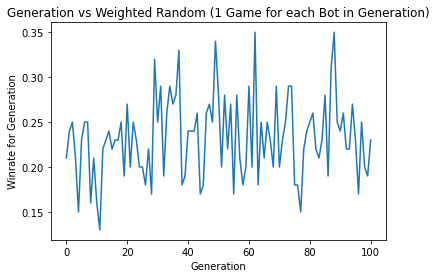

In [151]:
import matplotlib.pyplot as plt


x = np.arange(0,101,1)

print(x)

plt.plot(x,generation_winrate1)
plt.title("Generation vs Weighted Random (1 Game for each Bot in Generation)")
plt.xlabel("Generation")
plt.ylabel("Winrate for Generation")


In [147]:
generation_winrate5 = []

num = 0
for gen in gen_list:
    
    gp_win = 0
    
    for i in range(100):
    
        gp = gen["{0}".format(i)]
        gp.set_color(Color.RED)
        
        gp_game_win = 0
        blue_game_win = 0
        white_game_win = 0
        orange_game_win = 0
    
        for j in range(5):
            play = Game([gp,wrb,wrw,wro]).play()
    
            if play == Color.RED:
                gp_game_win += 1
            
            elif play == Color.BLUE:
                blue_game_win += 1
            
            elif play == Color.WHITE:
                white_game_win += 1
            
            elif play == Color.ORANGE:
                orange_game_win += 1
                
        
        if gp_game_win >= blue_game_win and gp_game_win >= white_game_win and gp_game_win >= orange_game_win:
            
            if gp_game_win > blue_game_win and gp_game_win > white_game_win and gp_game_win > orange_game_win:
                gp_win += 1
            
            elif gp_game_win == blue_game_win:
                play = Game([gp,wrb]).play()
                
                if play == Color.RED:
                    gp_win +=1
                    
            elif gp_game_win == white_game_win:
                play = Game([gp,wrw]).play()
                
                if play == Color.RED:
                    gp_win +=1
                    
            elif gp_game_win == orange_game_win:
                play = Game([gp,wro]).play()
                
                if play == Color.RED:
                    gp_win +=1
            
        
    gp_winrate = gp_win / 100

    generation_winrate5.append(gp_winrate)
    
    num += 1
    print(num)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]


Text(0, 0.5, 'Winrate for Generation')

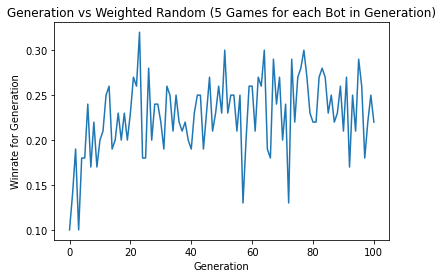

In [148]:
x = np.arange(0,101,1)

print(x)

plt.plot(x,generation_winrate5)
plt.title("Generation vs Weighted Random (5 Games for each Bot in Generation)")
plt.xlabel("Generation")
plt.ylabel("Winrate for Generation")

In [152]:
generation_winrate10_wr = []

num = 0
for gen in gen_list:
    
    gp_win = 0
    
    for i in range(100):
    
        gp = gen["{0}".format(i)]
        gp.set_color(Color.RED)
        
    
        for j in range(10):
            play = Game([gp,wrb,wrw,wro]).play()
    
            if play == Color.RED:
                gp_win += 1

            
        
    gp_winrate = gp_win / 1000

    generation_winrate10_wr.append(gp_winrate)
    
    num += 1
    print(num)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]


Text(0, 0.5, 'Winrate for Generation')

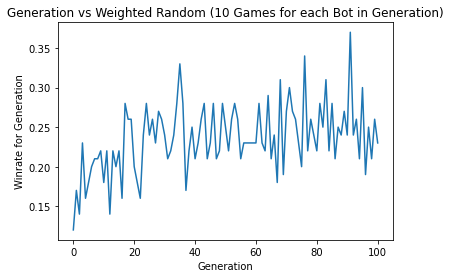

In [153]:
x = np.arange(0,101,1)

print(x)

plt.plot(x,generation_winrate10_wr)
plt.title("Generation vs Weighted Random (10 Games for each Bot in Generation)")
plt.xlabel("Generation")
plt.ylabel("Winrate for Generation")

In [173]:
rb = RandomPlayer(Color.BLUE)
rw = RandomPlayer(Color.WHITE)
ro = RandomPlayer(Color.ORANGE)

generation_winrate10_random = []

num = 0
for gen in gen_list:
    
    gp_win = 0
    
    for i in range(100):
    
        gp = gen["{0}".format(i)]
        gp.set_color(Color.RED)
        
    
        for j in range(10):
            play = Game([gp,rb,rw,ro]).play()
    
            if play == Color.RED:
                gp_win += 1
            
            
        
    gp_winrate = gp_win / 1000

    generation_winrate10_random.append(gp_winrate)
    
    num += 1
    print(num)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]


Text(0, 0.5, 'Winrate for Generation')

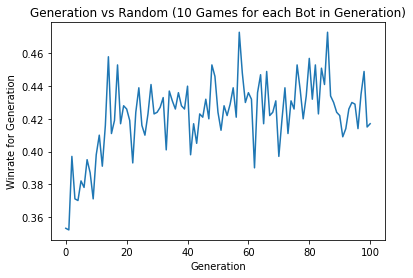

In [174]:
x = np.arange(0,101,1)

print(x)

plt.plot(x,generation_winrate10_random)
plt.title("Generation vs Random (10 Games for each Bot in Generation)")
plt.xlabel("Generation")
plt.ylabel("Winrate for Generation")

In [175]:
generation_winrate10_wr = []

num = 0
for gen in gen_list:
    
    gp_win = 0
    
    for i in range(100):
    
        gp = gen["{0}".format(i)]
        gp.set_color(Color.RED)
        
    
        for j in range(10):
            play = Game([gp,wrb,wrw,wro]).play()
    
            if play == Color.RED:
                gp_win += 1

            
        
    gp_winrate = gp_win / 1000

    generation_winrate10_wr.append(gp_winrate)
    
    num += 1
    print(num)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101


Text(0, 0.5, 'Winrate for Generation')

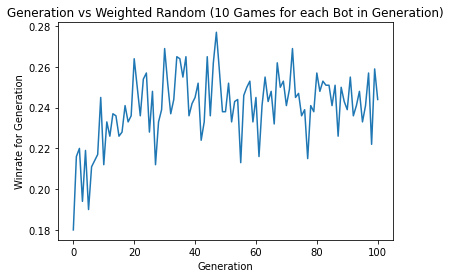

In [176]:
plt.plot(x,generation_winrate10_wr)
plt.title("Generation vs Weighted Random (10 Games for each Bot in Generation)")
plt.xlabel("Generation")
plt.ylabel("Winrate for Generation")